# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

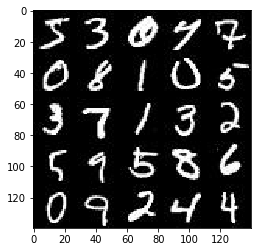

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

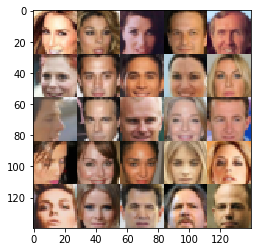

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.13.1
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    # img_dim = (image_width, image_height, image_channels)
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels ), name = 'input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name = 'input_z')
    learning_rate = tf.placeholder(tf.float32, None, name = 'learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        #input layer = 28,28,3
        layer1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'same' )
        layer1 = tf.layers.batch_normalization(layer1,training=True)
        layer1 = tf.maximum(alpha * layer1,layer1)
        #print(layer1.shape)
        #input layer = 14,14,64
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides = 2, padding = 'same' )
        layer2 = tf.layers.batch_normalization(layer2,training=True)
        layer2 = tf.maximum(alpha * layer2, layer2)
        #print(layer2.shape)
        #input layer 7,7,128
        
        layer3 = tf.layers.conv2d(layer2, 256, 5, strides = 2, padding = 'same' )
        layer3 = tf.layers.batch_normalization(layer3,training=True)
        layer3 = tf.maximum(alpha * layer3, layer3)
        #print(layer3.shape)
        #input layer 4,4,256
        
        layer4 = tf.layers.conv2d(layer3, 512, 5, strides = 2, padding = 'same' )
        layer4 = tf.layers.batch_normalization(layer4,training=True) 
        layer4 = tf.maximum(alpha * layer4, layer4)
        #print(layer4.shape)
        #input layer 2,2,512
        
        flat = tf.reshape(layer4, (-1, 2*2*512))
        
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\HENZELALMEIDADOSSANT\Anaconda3\envs\TF\lib\site-packages\IPython\core\interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-5-bb9d6e8dd2ea>", line 25, in <module>
    tests.test_model_inputs(model_inputs)  File "C:\Users\HENZELALMEIDADOSSANT\Documents\deep-learning\face_generation\problem_unittests.py", line 14, in func_wrapper
    return result  File "C:\Users\HENZELALMEIDADOSSANT\Documents\deep-learning\face_generation\problem_unittests.py", line 68, in test_model_inputs
    _check_input(learn_rate, [], 'Learning Rate')  File "C:\Users\HENZELALMEIDADOSSANT\Documents\deep-learning\face_generation\problem_unittests.py", line 38, in _check_input
    '{} has b

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        layer1 = tf.layers.dense(z,2*2*512)
        layer1 = tf.reshape(layer1, (-1, 2, 2, 512))
        layer1 = tf.layers.batch_normalization(layer1,training = is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        #input layer 2,2,512
        #print(layer1.shape)
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5,strides = 2, padding = 'valid')
        layer2 = tf.layers.batch_normalization(layer2, training = is_train)
        layer2 = tf.maximum(alpha * layer2,layer2)
        #print(layer2.shape)
        #input layers 7,7,256
        
        layer3 =  tf.layers.conv2d_transpose(layer2, 128, 5,strides = 2, padding = 'same')
        layer3 = tf.layers.batch_normalization(layer3, training = is_train)
        layer3 = tf.maximum(alpha * layer3,layer3)
        #print(layer3.shape)
        #input layer 14,14,128
        
        layer4 =  tf.layers.conv2d_transpose(layer3, 64, 5,strides = 2, padding = 'same')
        layer4 = tf.layers.batch_normalization(layer4, training = is_train)
        layer4 = tf.maximum(alpha * layer4,layer4)
        #print(layer4.shape)
        #input layer 28,28,64
        
        
        logits = tf.layers.conv2d_transpose(layer4,out_channel_dim, 5, strides = 1, padding = 'same')
        output=  tf.tanh(logits)
        
        
        
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model,reuse=True)
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake       
        
    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    if (data_image_mode == "L"):
        out_channel_dim=1
    else:
        out_channel_dim=3
    
    #tf.reset_default_graph()
    # model_inputs(image_width, image_height, image_channels, z_dim)
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    lr = learning_rate
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    print_every=10
    show_every=100
    samples, losses = [], []
    steps=0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps += 1
                batch_images = batch_images * 2
                
                # Random noise for Z
                batch_z=np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #  optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images}) saw suggestion to run 2x
                
                if steps % print_every == 0:
                    # In end of each epoch, get the losses and print
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f} ...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses 
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                    
        # show images at end of training
        show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.1823 ... Generator Loss: 3.6966
Epoch 1/2... Discriminator Loss: 2.1822 ... Generator Loss: 2.7374
Epoch 1/2... Discriminator Loss: 1.1620 ... Generator Loss: 3.6625
Epoch 1/2... Discriminator Loss: 1.4287 ... Generator Loss: 1.5375
Epoch 1/2... Discriminator Loss: 1.6416 ... Generator Loss: 2.9329
Epoch 1/2... Discriminator Loss: 1.9087 ... Generator Loss: 1.7016
Epoch 1/2... Discriminator Loss: 1.4051 ... Generator Loss: 1.2197
Epoch 1/2... Discriminator Loss: 1.3347 ... Generator Loss: 1.1405
Epoch 1/2... Discriminator Loss: 1.4815 ... Generator Loss: 1.5551
Epoch 1/2... Discriminator Loss: 1.5342 ... Generator Loss: 1.4177


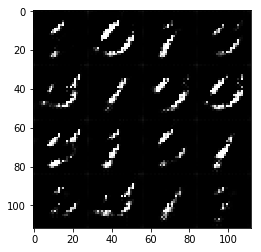

Epoch 1/2... Discriminator Loss: 1.3056 ... Generator Loss: 1.0668
Epoch 1/2... Discriminator Loss: 1.4994 ... Generator Loss: 1.3484
Epoch 1/2... Discriminator Loss: 1.4365 ... Generator Loss: 1.3138
Epoch 1/2... Discriminator Loss: 1.4316 ... Generator Loss: 1.0422
Epoch 1/2... Discriminator Loss: 1.6855 ... Generator Loss: 1.7289
Epoch 1/2... Discriminator Loss: 1.5258 ... Generator Loss: 1.2144
Epoch 1/2... Discriminator Loss: 1.3154 ... Generator Loss: 1.0352
Epoch 1/2... Discriminator Loss: 1.4236 ... Generator Loss: 1.1761
Epoch 1/2... Discriminator Loss: 1.4641 ... Generator Loss: 1.3394
Epoch 1/2... Discriminator Loss: 1.6522 ... Generator Loss: 1.2056


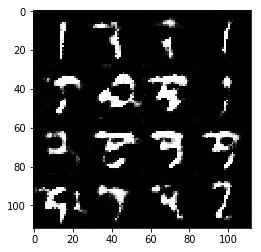

Epoch 1/2... Discriminator Loss: 1.3842 ... Generator Loss: 1.0418
Epoch 1/2... Discriminator Loss: 1.3616 ... Generator Loss: 0.9347
Epoch 1/2... Discriminator Loss: 1.8373 ... Generator Loss: 1.7716
Epoch 1/2... Discriminator Loss: 1.4904 ... Generator Loss: 0.9171
Epoch 1/2... Discriminator Loss: 1.3590 ... Generator Loss: 1.4125
Epoch 1/2... Discriminator Loss: 1.4164 ... Generator Loss: 1.2480
Epoch 1/2... Discriminator Loss: 1.7047 ... Generator Loss: 1.6080
Epoch 1/2... Discriminator Loss: 1.4832 ... Generator Loss: 1.0884
Epoch 1/2... Discriminator Loss: 1.4212 ... Generator Loss: 0.9088
Epoch 1/2... Discriminator Loss: 1.4221 ... Generator Loss: 0.9682


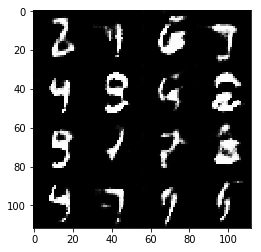

Epoch 1/2... Discriminator Loss: 1.4202 ... Generator Loss: 0.9095
Epoch 1/2... Discriminator Loss: 1.3662 ... Generator Loss: 0.8886
Epoch 1/2... Discriminator Loss: 1.5436 ... Generator Loss: 1.1604
Epoch 1/2... Discriminator Loss: 1.3886 ... Generator Loss: 0.9960
Epoch 1/2... Discriminator Loss: 1.4171 ... Generator Loss: 1.1216
Epoch 1/2... Discriminator Loss: 1.4920 ... Generator Loss: 1.1057
Epoch 1/2... Discriminator Loss: 1.4197 ... Generator Loss: 0.9999
Epoch 1/2... Discriminator Loss: 1.3682 ... Generator Loss: 1.2360
Epoch 1/2... Discriminator Loss: 1.4867 ... Generator Loss: 1.1582
Epoch 1/2... Discriminator Loss: 1.5939 ... Generator Loss: 1.3124


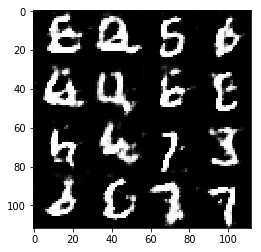

Epoch 1/2... Discriminator Loss: 1.3636 ... Generator Loss: 1.2873
Epoch 1/2... Discriminator Loss: 1.4280 ... Generator Loss: 0.8972
Epoch 1/2... Discriminator Loss: 1.2720 ... Generator Loss: 0.9144
Epoch 1/2... Discriminator Loss: 1.3754 ... Generator Loss: 1.5598
Epoch 1/2... Discriminator Loss: 1.4342 ... Generator Loss: 1.0208
Epoch 1/2... Discriminator Loss: 1.2230 ... Generator Loss: 0.9000
Epoch 1/2... Discriminator Loss: 1.4545 ... Generator Loss: 1.0223
Epoch 1/2... Discriminator Loss: 1.2984 ... Generator Loss: 1.2048
Epoch 1/2... Discriminator Loss: 1.3857 ... Generator Loss: 1.2147
Epoch 1/2... Discriminator Loss: 1.4267 ... Generator Loss: 1.2881


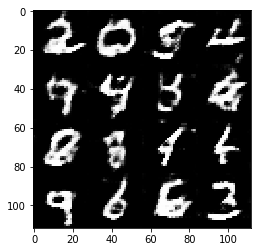

Epoch 1/2... Discriminator Loss: 1.4578 ... Generator Loss: 0.4558
Epoch 1/2... Discriminator Loss: 1.5248 ... Generator Loss: 0.3879
Epoch 1/2... Discriminator Loss: 1.4707 ... Generator Loss: 0.3543
Epoch 1/2... Discriminator Loss: 1.4093 ... Generator Loss: 0.4579
Epoch 1/2... Discriminator Loss: 1.4347 ... Generator Loss: 0.3769
Epoch 1/2... Discriminator Loss: 1.4595 ... Generator Loss: 0.3877
Epoch 1/2... Discriminator Loss: 1.4950 ... Generator Loss: 0.3855
Epoch 1/2... Discriminator Loss: 1.7082 ... Generator Loss: 0.2655
Epoch 1/2... Discriminator Loss: 1.6166 ... Generator Loss: 0.2704
Epoch 1/2... Discriminator Loss: 1.3859 ... Generator Loss: 0.4033


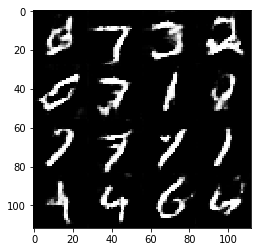

Epoch 1/2... Discriminator Loss: 1.6939 ... Generator Loss: 0.2974
Epoch 1/2... Discriminator Loss: 1.3823 ... Generator Loss: 0.4793
Epoch 1/2... Discriminator Loss: 1.5387 ... Generator Loss: 0.3426
Epoch 1/2... Discriminator Loss: 1.4166 ... Generator Loss: 0.4584
Epoch 1/2... Discriminator Loss: 1.4706 ... Generator Loss: 0.3768
Epoch 1/2... Discriminator Loss: 1.3091 ... Generator Loss: 0.4530
Epoch 1/2... Discriminator Loss: 1.4292 ... Generator Loss: 0.4564
Epoch 1/2... Discriminator Loss: 1.2758 ... Generator Loss: 0.5567
Epoch 1/2... Discriminator Loss: 1.3424 ... Generator Loss: 0.5107
Epoch 1/2... Discriminator Loss: 1.1798 ... Generator Loss: 0.9119


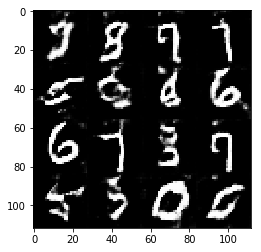

Epoch 1/2... Discriminator Loss: 1.3013 ... Generator Loss: 1.0878
Epoch 1/2... Discriminator Loss: 1.3896 ... Generator Loss: 1.0645
Epoch 1/2... Discriminator Loss: 1.3209 ... Generator Loss: 1.5974
Epoch 1/2... Discriminator Loss: 1.3649 ... Generator Loss: 1.0330
Epoch 1/2... Discriminator Loss: 1.2257 ... Generator Loss: 1.1844
Epoch 1/2... Discriminator Loss: 1.2142 ... Generator Loss: 1.5235
Epoch 1/2... Discriminator Loss: 1.2679 ... Generator Loss: 1.0487
Epoch 1/2... Discriminator Loss: 1.1893 ... Generator Loss: 0.8836
Epoch 1/2... Discriminator Loss: 1.2337 ... Generator Loss: 1.0062
Epoch 1/2... Discriminator Loss: 1.3657 ... Generator Loss: 0.8635


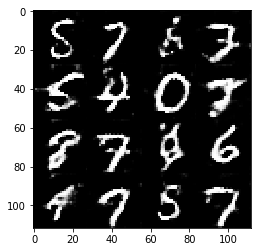

Epoch 1/2... Discriminator Loss: 1.2118 ... Generator Loss: 0.6684
Epoch 1/2... Discriminator Loss: 0.9835 ... Generator Loss: 0.5867
Epoch 1/2... Discriminator Loss: 1.3729 ... Generator Loss: 0.5083
Epoch 1/2... Discriminator Loss: 1.4278 ... Generator Loss: 2.1034
Epoch 1/2... Discriminator Loss: 1.2366 ... Generator Loss: 1.2981
Epoch 1/2... Discriminator Loss: 1.4266 ... Generator Loss: 1.0309
Epoch 1/2... Discriminator Loss: 1.5167 ... Generator Loss: 0.9890
Epoch 1/2... Discriminator Loss: 0.9526 ... Generator Loss: 1.2104
Epoch 1/2... Discriminator Loss: 1.1077 ... Generator Loss: 1.5151
Epoch 1/2... Discriminator Loss: 0.9071 ... Generator Loss: 1.0033


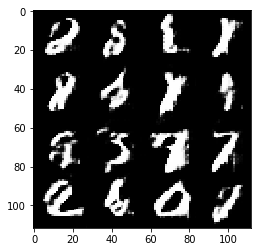

Epoch 1/2... Discriminator Loss: 1.0850 ... Generator Loss: 0.8314
Epoch 1/2... Discriminator Loss: 1.2442 ... Generator Loss: 1.4728
Epoch 1/2... Discriminator Loss: 1.2930 ... Generator Loss: 1.0747
Epoch 2/2... Discriminator Loss: 1.2291 ... Generator Loss: 0.7112
Epoch 2/2... Discriminator Loss: 1.0659 ... Generator Loss: 0.8937
Epoch 2/2... Discriminator Loss: 1.0416 ... Generator Loss: 0.7913
Epoch 2/2... Discriminator Loss: 1.2283 ... Generator Loss: 0.8274
Epoch 2/2... Discriminator Loss: 2.0331 ... Generator Loss: 1.9456
Epoch 2/2... Discriminator Loss: 1.0999 ... Generator Loss: 0.9306
Epoch 2/2... Discriminator Loss: 1.0695 ... Generator Loss: 1.0547


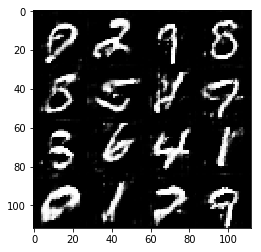

Epoch 2/2... Discriminator Loss: 1.2726 ... Generator Loss: 1.3676
Epoch 2/2... Discriminator Loss: 1.0504 ... Generator Loss: 0.8425
Epoch 2/2... Discriminator Loss: 1.4545 ... Generator Loss: 0.3530
Epoch 2/2... Discriminator Loss: 1.4465 ... Generator Loss: 0.4081
Epoch 2/2... Discriminator Loss: 1.4213 ... Generator Loss: 0.4076
Epoch 2/2... Discriminator Loss: 1.4618 ... Generator Loss: 0.3673
Epoch 2/2... Discriminator Loss: 1.4621 ... Generator Loss: 0.4453
Epoch 2/2... Discriminator Loss: 2.0686 ... Generator Loss: 2.2890
Epoch 2/2... Discriminator Loss: 1.8039 ... Generator Loss: 1.9524
Epoch 2/2... Discriminator Loss: 1.2829 ... Generator Loss: 0.7453


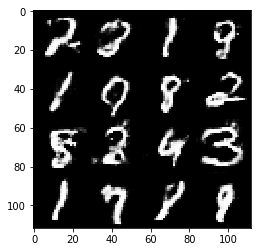

Epoch 2/2... Discriminator Loss: 1.0360 ... Generator Loss: 1.2562
Epoch 2/2... Discriminator Loss: 1.2183 ... Generator Loss: 0.5617
Epoch 2/2... Discriminator Loss: 1.9126 ... Generator Loss: 0.2021
Epoch 2/2... Discriminator Loss: 1.2801 ... Generator Loss: 0.5273
Epoch 2/2... Discriminator Loss: 1.5650 ... Generator Loss: 0.3910
Epoch 2/2... Discriminator Loss: 1.5322 ... Generator Loss: 0.5425
Epoch 2/2... Discriminator Loss: 1.3832 ... Generator Loss: 0.3998
Epoch 2/2... Discriminator Loss: 1.7856 ... Generator Loss: 0.2161
Epoch 2/2... Discriminator Loss: 1.0536 ... Generator Loss: 0.9365
Epoch 2/2... Discriminator Loss: 1.4332 ... Generator Loss: 0.3291


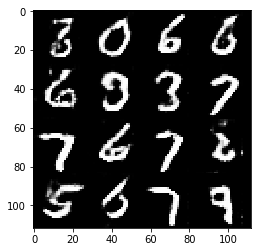

Epoch 2/2... Discriminator Loss: 1.2171 ... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 1.4085 ... Generator Loss: 0.4548
Epoch 2/2... Discriminator Loss: 1.1400 ... Generator Loss: 1.2695
Epoch 2/2... Discriminator Loss: 1.1395 ... Generator Loss: 1.4456
Epoch 2/2... Discriminator Loss: 1.0051 ... Generator Loss: 1.1648
Epoch 2/2... Discriminator Loss: 1.0871 ... Generator Loss: 1.4027
Epoch 2/2... Discriminator Loss: 1.0121 ... Generator Loss: 1.4818
Epoch 2/2... Discriminator Loss: 1.1290 ... Generator Loss: 1.2603
Epoch 2/2... Discriminator Loss: 1.1388 ... Generator Loss: 1.4167
Epoch 2/2... Discriminator Loss: 2.1177 ... Generator Loss: 2.4089


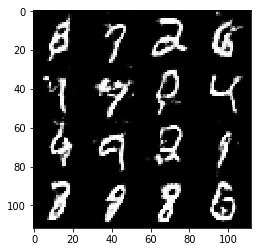

Epoch 2/2... Discriminator Loss: 1.9000 ... Generator Loss: 2.4285
Epoch 2/2... Discriminator Loss: 1.0200 ... Generator Loss: 1.2000
Epoch 2/2... Discriminator Loss: 1.2654 ... Generator Loss: 0.8120
Epoch 2/2... Discriminator Loss: 0.9714 ... Generator Loss: 1.3134
Epoch 2/2... Discriminator Loss: 1.9262 ... Generator Loss: 2.7519
Epoch 2/2... Discriminator Loss: 1.2405 ... Generator Loss: 0.5387
Epoch 2/2... Discriminator Loss: 1.7948 ... Generator Loss: 1.4956
Epoch 2/2... Discriminator Loss: 1.1773 ... Generator Loss: 1.8603
Epoch 2/2... Discriminator Loss: 1.6516 ... Generator Loss: 0.2903
Epoch 2/2... Discriminator Loss: 1.6188 ... Generator Loss: 0.2969


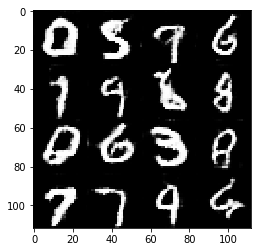

Epoch 2/2... Discriminator Loss: 1.3149 ... Generator Loss: 0.5937
Epoch 2/2... Discriminator Loss: 1.0855 ... Generator Loss: 0.8522
Epoch 2/2... Discriminator Loss: 1.1021 ... Generator Loss: 1.2581
Epoch 2/2... Discriminator Loss: 0.8604 ... Generator Loss: 1.1644
Epoch 2/2... Discriminator Loss: 0.9520 ... Generator Loss: 1.1568
Epoch 2/2... Discriminator Loss: 1.1775 ... Generator Loss: 0.4633
Epoch 2/2... Discriminator Loss: 1.7992 ... Generator Loss: 0.2205
Epoch 2/2... Discriminator Loss: 1.1454 ... Generator Loss: 0.4929
Epoch 2/2... Discriminator Loss: 0.8011 ... Generator Loss: 1.1480
Epoch 2/2... Discriminator Loss: 0.7567 ... Generator Loss: 1.4562


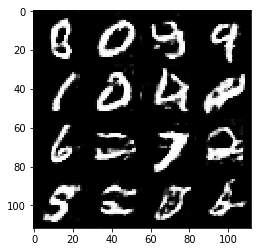

Epoch 2/2... Discriminator Loss: 0.9389 ... Generator Loss: 1.4809
Epoch 2/2... Discriminator Loss: 0.9723 ... Generator Loss: 1.2255
Epoch 2/2... Discriminator Loss: 2.4544 ... Generator Loss: 3.7914
Epoch 2/2... Discriminator Loss: 0.6423 ... Generator Loss: 1.7108
Epoch 2/2... Discriminator Loss: 1.0834 ... Generator Loss: 1.5340
Epoch 2/2... Discriminator Loss: 1.3227 ... Generator Loss: 0.4636
Epoch 2/2... Discriminator Loss: 1.6570 ... Generator Loss: 0.3945
Epoch 2/2... Discriminator Loss: 1.1010 ... Generator Loss: 0.9967
Epoch 2/2... Discriminator Loss: 0.9941 ... Generator Loss: 1.3227
Epoch 2/2... Discriminator Loss: 1.2934 ... Generator Loss: 0.4454


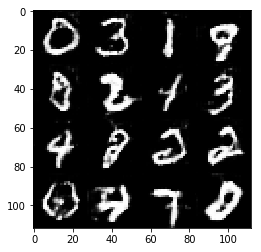

Epoch 2/2... Discriminator Loss: 1.2560 ... Generator Loss: 2.0165
Epoch 2/2... Discriminator Loss: 0.8662 ... Generator Loss: 1.4086
Epoch 2/2... Discriminator Loss: 0.6412 ... Generator Loss: 1.1837
Epoch 2/2... Discriminator Loss: 0.9720 ... Generator Loss: 1.3785
Epoch 2/2... Discriminator Loss: 0.5748 ... Generator Loss: 1.7180
Epoch 2/2... Discriminator Loss: 1.8223 ... Generator Loss: 0.2331
Epoch 2/2... Discriminator Loss: 1.1938 ... Generator Loss: 0.4406
Epoch 2/2... Discriminator Loss: 0.8945 ... Generator Loss: 0.6619
Epoch 2/2... Discriminator Loss: 0.7574 ... Generator Loss: 0.9588
Epoch 2/2... Discriminator Loss: 0.8651 ... Generator Loss: 0.8703


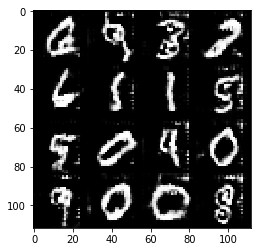

Epoch 2/2... Discriminator Loss: 1.6389 ... Generator Loss: 0.2510
Epoch 2/2... Discriminator Loss: 1.3171 ... Generator Loss: 0.4105
Epoch 2/2... Discriminator Loss: 2.0300 ... Generator Loss: 0.1639
Epoch 2/2... Discriminator Loss: 1.2437 ... Generator Loss: 0.5227
Epoch 2/2... Discriminator Loss: 1.1122 ... Generator Loss: 1.3919
Epoch 2/2... Discriminator Loss: 0.9873 ... Generator Loss: 2.1270
Epoch 2/2... Discriminator Loss: 0.8718 ... Generator Loss: 1.4279
Epoch 2/2... Discriminator Loss: 1.4018 ... Generator Loss: 0.3602
Epoch 2/2... Discriminator Loss: 1.4903 ... Generator Loss: 2.7346
Epoch 2/2... Discriminator Loss: 1.4913 ... Generator Loss: 0.6651


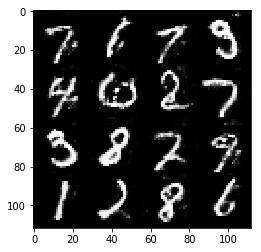

Epoch 2/2... Discriminator Loss: 1.2390 ... Generator Loss: 0.5159
Epoch 2/2... Discriminator Loss: 0.6557 ... Generator Loss: 1.2323
Epoch 2/2... Discriminator Loss: 0.8607 ... Generator Loss: 1.0616
Epoch 2/2... Discriminator Loss: 1.1452 ... Generator Loss: 0.5922
Epoch 2/2... Discriminator Loss: 1.4065 ... Generator Loss: 0.3773
Epoch 2/2... Discriminator Loss: 1.2282 ... Generator Loss: 1.6249
Epoch 2/2... Discriminator Loss: 0.6950 ... Generator Loss: 1.1523


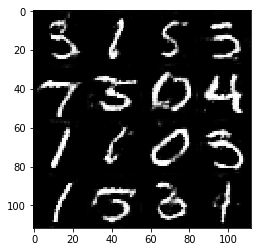

In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2... Discriminator Loss: 0.4802 ... Generator Loss: 5.3058
Epoch 1/2... Discriminator Loss: 0.9334 ... Generator Loss: 0.5668
Epoch 1/2... Discriminator Loss: 0.8930 ... Generator Loss: 0.7937
Epoch 1/2... Discriminator Loss: 1.0084 ... Generator Loss: 0.8485
Epoch 1/2... Discriminator Loss: 0.7012 ... Generator Loss: 0.9645
Epoch 1/2... Discriminator Loss: 0.4060 ... Generator Loss: 1.2613
Epoch 1/2... Discriminator Loss: 0.8868 ... Generator Loss: 2.2689
Epoch 1/2... Discriminator Loss: 0.0896 ... Generator Loss: 3.3593
Epoch 1/2... Discriminator Loss: 1.4288 ... Generator Loss: 3.6903
Epoch 1/2... Discriminator Loss: 0.5818 ... Generator Loss: 1.1879


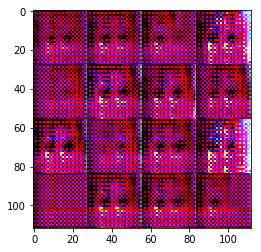

Epoch 1/2... Discriminator Loss: 0.1004 ... Generator Loss: 2.7333
Epoch 1/2... Discriminator Loss: 0.7559 ... Generator Loss: 4.5418
Epoch 1/2... Discriminator Loss: 3.5243 ... Generator Loss: 5.8009
Epoch 1/2... Discriminator Loss: 0.2000 ... Generator Loss: 2.4520
Epoch 1/2... Discriminator Loss: 1.2909 ... Generator Loss: 0.5751
Epoch 1/2... Discriminator Loss: 0.4095 ... Generator Loss: 1.8155
Epoch 1/2... Discriminator Loss: 0.2163 ... Generator Loss: 2.5773
Epoch 1/2... Discriminator Loss: 1.3557 ... Generator Loss: 0.3660
Epoch 1/2... Discriminator Loss: 1.2537 ... Generator Loss: 0.4023
Epoch 1/2... Discriminator Loss: 0.9412 ... Generator Loss: 0.9483


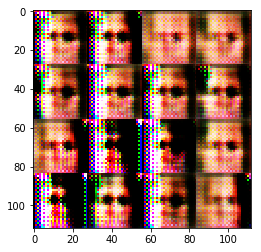

Epoch 1/2... Discriminator Loss: 1.2840 ... Generator Loss: 1.8740
Epoch 1/2... Discriminator Loss: 1.1975 ... Generator Loss: 0.7130
Epoch 1/2... Discriminator Loss: 1.2320 ... Generator Loss: 0.8891
Epoch 1/2... Discriminator Loss: 2.2096 ... Generator Loss: 2.9622
Epoch 1/2... Discriminator Loss: 1.2626 ... Generator Loss: 0.5708
Epoch 1/2... Discriminator Loss: 0.7525 ... Generator Loss: 1.3325
Epoch 1/2... Discriminator Loss: 0.9327 ... Generator Loss: 0.9249
Epoch 1/2... Discriminator Loss: 2.0062 ... Generator Loss: 0.2273
Epoch 1/2... Discriminator Loss: 0.6165 ... Generator Loss: 1.9532
Epoch 1/2... Discriminator Loss: 0.7049 ... Generator Loss: 1.2545


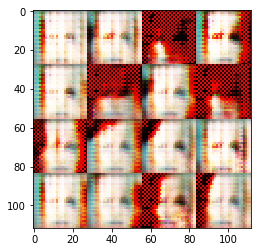

Epoch 1/2... Discriminator Loss: 1.4150 ... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 0.8670 ... Generator Loss: 2.3856
Epoch 1/2... Discriminator Loss: 3.4950 ... Generator Loss: 0.0415
Epoch 1/2... Discriminator Loss: 1.4118 ... Generator Loss: 0.6437
Epoch 1/2... Discriminator Loss: 1.1661 ... Generator Loss: 1.0337
Epoch 1/2... Discriminator Loss: 1.0407 ... Generator Loss: 0.9763
Epoch 1/2... Discriminator Loss: 1.1057 ... Generator Loss: 1.0141
Epoch 1/2... Discriminator Loss: 0.6286 ... Generator Loss: 1.2713
Epoch 1/2... Discriminator Loss: 1.2248 ... Generator Loss: 0.4529
Epoch 1/2... Discriminator Loss: 1.2689 ... Generator Loss: 0.9375


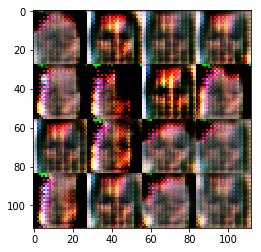

Epoch 1/2... Discriminator Loss: 0.7336 ... Generator Loss: 1.4690
Epoch 1/2... Discriminator Loss: 0.9909 ... Generator Loss: 0.9795
Epoch 1/2... Discriminator Loss: 1.0703 ... Generator Loss: 1.1006
Epoch 1/2... Discriminator Loss: 0.9762 ... Generator Loss: 0.6347
Epoch 1/2... Discriminator Loss: 1.2555 ... Generator Loss: 0.6098
Epoch 1/2... Discriminator Loss: 0.5806 ... Generator Loss: 1.1947
Epoch 1/2... Discriminator Loss: 2.3511 ... Generator Loss: 0.4239
Epoch 1/2... Discriminator Loss: 1.0325 ... Generator Loss: 0.7734
Epoch 1/2... Discriminator Loss: 1.1073 ... Generator Loss: 0.6399
Epoch 1/2... Discriminator Loss: 1.4406 ... Generator Loss: 0.5075


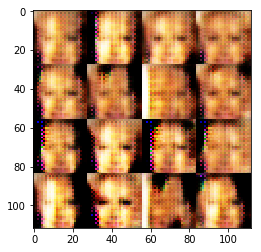

Epoch 1/2... Discriminator Loss: 1.6379 ... Generator Loss: 0.4783
Epoch 1/2... Discriminator Loss: 0.8563 ... Generator Loss: 1.3393
Epoch 1/2... Discriminator Loss: 0.8264 ... Generator Loss: 2.6672
Epoch 1/2... Discriminator Loss: 3.7313 ... Generator Loss: 5.7314
Epoch 1/2... Discriminator Loss: 1.8208 ... Generator Loss: 0.3883
Epoch 1/2... Discriminator Loss: 1.0996 ... Generator Loss: 0.6673
Epoch 1/2... Discriminator Loss: 1.3554 ... Generator Loss: 0.5337
Epoch 1/2... Discriminator Loss: 0.9635 ... Generator Loss: 1.4250
Epoch 1/2... Discriminator Loss: 0.8045 ... Generator Loss: 1.0112
Epoch 1/2... Discriminator Loss: 1.4146 ... Generator Loss: 0.5011


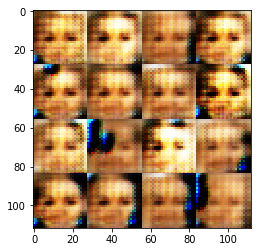

Epoch 1/2... Discriminator Loss: 0.8874 ... Generator Loss: 0.9885
Epoch 1/2... Discriminator Loss: 1.1668 ... Generator Loss: 1.6664
Epoch 1/2... Discriminator Loss: 1.1125 ... Generator Loss: 0.6727
Epoch 1/2... Discriminator Loss: 1.8330 ... Generator Loss: 0.2203
Epoch 1/2... Discriminator Loss: 1.2583 ... Generator Loss: 0.5226
Epoch 1/2... Discriminator Loss: 1.6190 ... Generator Loss: 1.2210
Epoch 1/2... Discriminator Loss: 1.1259 ... Generator Loss: 1.0838
Epoch 1/2... Discriminator Loss: 1.5812 ... Generator Loss: 0.3253
Epoch 1/2... Discriminator Loss: 1.8505 ... Generator Loss: 0.2984
Epoch 1/2... Discriminator Loss: 0.8807 ... Generator Loss: 0.9979


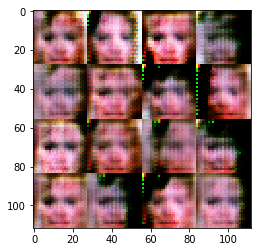

Epoch 1/2... Discriminator Loss: 1.3236 ... Generator Loss: 1.1232
Epoch 1/2... Discriminator Loss: 1.0092 ... Generator Loss: 0.9171
Epoch 1/2... Discriminator Loss: 0.7948 ... Generator Loss: 1.7936
Epoch 1/2... Discriminator Loss: 1.6771 ... Generator Loss: 0.3123
Epoch 1/2... Discriminator Loss: 1.2685 ... Generator Loss: 0.9797
Epoch 1/2... Discriminator Loss: 1.3071 ... Generator Loss: 0.5656
Epoch 1/2... Discriminator Loss: 1.5071 ... Generator Loss: 0.7201
Epoch 1/2... Discriminator Loss: 1.1253 ... Generator Loss: 0.9651
Epoch 1/2... Discriminator Loss: 1.4326 ... Generator Loss: 0.4215
Epoch 1/2... Discriminator Loss: 1.2009 ... Generator Loss: 0.8011


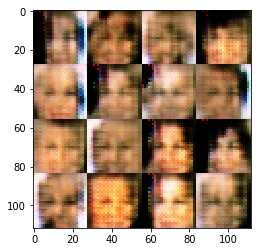

Epoch 1/2... Discriminator Loss: 1.5807 ... Generator Loss: 0.3664
Epoch 1/2... Discriminator Loss: 1.4058 ... Generator Loss: 1.2025
Epoch 1/2... Discriminator Loss: 1.0061 ... Generator Loss: 0.8164
Epoch 1/2... Discriminator Loss: 1.3321 ... Generator Loss: 0.4830
Epoch 1/2... Discriminator Loss: 1.0720 ... Generator Loss: 0.6560
Epoch 1/2... Discriminator Loss: 0.9102 ... Generator Loss: 0.7104
Epoch 1/2... Discriminator Loss: 1.3425 ... Generator Loss: 0.4792
Epoch 1/2... Discriminator Loss: 1.3314 ... Generator Loss: 0.5012
Epoch 1/2... Discriminator Loss: 1.1905 ... Generator Loss: 0.5529
Epoch 1/2... Discriminator Loss: 1.3288 ... Generator Loss: 0.5619


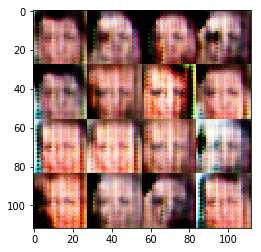

Epoch 1/2... Discriminator Loss: 0.8300 ... Generator Loss: 0.9154
Epoch 1/2... Discriminator Loss: 1.4098 ... Generator Loss: 1.1026
Epoch 1/2... Discriminator Loss: 1.2531 ... Generator Loss: 0.7657
Epoch 1/2... Discriminator Loss: 1.1475 ... Generator Loss: 0.5058
Epoch 1/2... Discriminator Loss: 1.2259 ... Generator Loss: 0.6760
Epoch 1/2... Discriminator Loss: 1.4041 ... Generator Loss: 1.2339
Epoch 1/2... Discriminator Loss: 0.9323 ... Generator Loss: 0.7307
Epoch 1/2... Discriminator Loss: 1.3097 ... Generator Loss: 0.8199
Epoch 1/2... Discriminator Loss: 1.1870 ... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 0.9855 ... Generator Loss: 1.2423


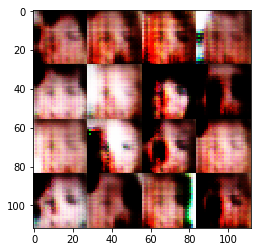

Epoch 1/2... Discriminator Loss: 1.0914 ... Generator Loss: 0.6262
Epoch 1/2... Discriminator Loss: 1.1524 ... Generator Loss: 0.5860
Epoch 1/2... Discriminator Loss: 1.8505 ... Generator Loss: 2.1551
Epoch 1/2... Discriminator Loss: 1.7769 ... Generator Loss: 0.3170
Epoch 1/2... Discriminator Loss: 1.1008 ... Generator Loss: 0.6343
Epoch 1/2... Discriminator Loss: 1.5392 ... Generator Loss: 0.3437
Epoch 1/2... Discriminator Loss: 1.4744 ... Generator Loss: 2.2606
Epoch 1/2... Discriminator Loss: 1.3705 ... Generator Loss: 0.6367
Epoch 1/2... Discriminator Loss: 0.9890 ... Generator Loss: 2.0725
Epoch 1/2... Discriminator Loss: 1.4609 ... Generator Loss: 0.3451


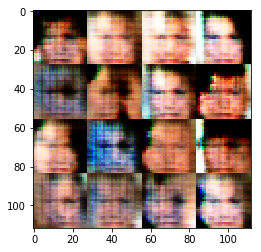

Epoch 1/2... Discriminator Loss: 1.4193 ... Generator Loss: 0.4234
Epoch 1/2... Discriminator Loss: 0.9928 ... Generator Loss: 0.6573
Epoch 1/2... Discriminator Loss: 1.6385 ... Generator Loss: 0.2971
Epoch 1/2... Discriminator Loss: 1.4540 ... Generator Loss: 0.3976
Epoch 1/2... Discriminator Loss: 0.8070 ... Generator Loss: 0.7290
Epoch 1/2... Discriminator Loss: 1.1720 ... Generator Loss: 0.6205
Epoch 1/2... Discriminator Loss: 1.1459 ... Generator Loss: 0.9719
Epoch 1/2... Discriminator Loss: 1.1527 ... Generator Loss: 0.5217
Epoch 1/2... Discriminator Loss: 1.4171 ... Generator Loss: 0.8461
Epoch 1/2... Discriminator Loss: 1.1523 ... Generator Loss: 0.6240


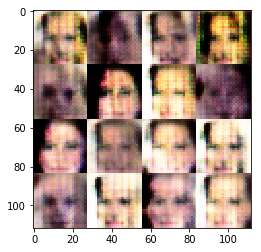

Epoch 1/2... Discriminator Loss: 1.3930 ... Generator Loss: 0.4047
Epoch 1/2... Discriminator Loss: 0.7507 ... Generator Loss: 1.1561
Epoch 1/2... Discriminator Loss: 1.1416 ... Generator Loss: 0.5519
Epoch 1/2... Discriminator Loss: 1.1526 ... Generator Loss: 0.7560
Epoch 1/2... Discriminator Loss: 1.6343 ... Generator Loss: 0.3130
Epoch 1/2... Discriminator Loss: 1.3748 ... Generator Loss: 0.5212
Epoch 1/2... Discriminator Loss: 1.1951 ... Generator Loss: 0.5717
Epoch 1/2... Discriminator Loss: 0.9898 ... Generator Loss: 1.1147
Epoch 1/2... Discriminator Loss: 1.2010 ... Generator Loss: 1.3176
Epoch 1/2... Discriminator Loss: 1.4973 ... Generator Loss: 0.3435


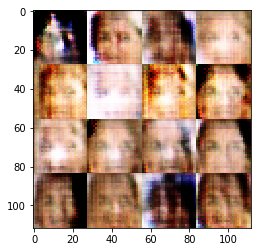

Epoch 1/2... Discriminator Loss: 1.4577 ... Generator Loss: 2.7339
Epoch 1/2... Discriminator Loss: 1.3066 ... Generator Loss: 0.5822
Epoch 1/2... Discriminator Loss: 0.9154 ... Generator Loss: 1.4435
Epoch 1/2... Discriminator Loss: 1.0856 ... Generator Loss: 0.7042
Epoch 1/2... Discriminator Loss: 0.6340 ... Generator Loss: 1.2112
Epoch 1/2... Discriminator Loss: 0.8908 ... Generator Loss: 0.9063
Epoch 1/2... Discriminator Loss: 1.1196 ... Generator Loss: 0.7661
Epoch 1/2... Discriminator Loss: 1.3275 ... Generator Loss: 0.4552
Epoch 1/2... Discriminator Loss: 0.7957 ... Generator Loss: 1.3059
Epoch 1/2... Discriminator Loss: 1.2906 ... Generator Loss: 2.0615


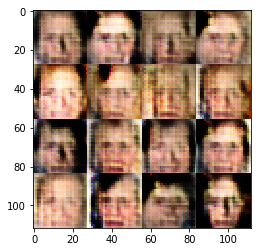

Epoch 1/2... Discriminator Loss: 0.7688 ... Generator Loss: 1.0349
Epoch 1/2... Discriminator Loss: 1.1265 ... Generator Loss: 0.7909
Epoch 1/2... Discriminator Loss: 1.2112 ... Generator Loss: 0.6054
Epoch 1/2... Discriminator Loss: 0.6908 ... Generator Loss: 1.0573
Epoch 1/2... Discriminator Loss: 1.2055 ... Generator Loss: 0.6162
Epoch 1/2... Discriminator Loss: 0.8368 ... Generator Loss: 1.3572
Epoch 1/2... Discriminator Loss: 1.1775 ... Generator Loss: 0.5997
Epoch 1/2... Discriminator Loss: 0.9048 ... Generator Loss: 1.1627
Epoch 1/2... Discriminator Loss: 0.8060 ... Generator Loss: 1.2964
Epoch 1/2... Discriminator Loss: 1.2691 ... Generator Loss: 0.6055


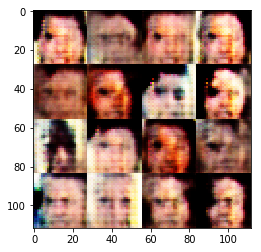

Epoch 1/2... Discriminator Loss: 1.2669 ... Generator Loss: 0.4155
Epoch 1/2... Discriminator Loss: 1.9040 ... Generator Loss: 0.2099
Epoch 1/2... Discriminator Loss: 1.2665 ... Generator Loss: 0.7199
Epoch 1/2... Discriminator Loss: 1.3013 ... Generator Loss: 0.8560
Epoch 1/2... Discriminator Loss: 0.8026 ... Generator Loss: 1.0467
Epoch 1/2... Discriminator Loss: 1.1729 ... Generator Loss: 1.7982
Epoch 1/2... Discriminator Loss: 0.9148 ... Generator Loss: 1.1061
Epoch 1/2... Discriminator Loss: 1.3833 ... Generator Loss: 0.6648
Epoch 1/2... Discriminator Loss: 0.9221 ... Generator Loss: 0.8181
Epoch 1/2... Discriminator Loss: 0.9710 ... Generator Loss: 1.2703


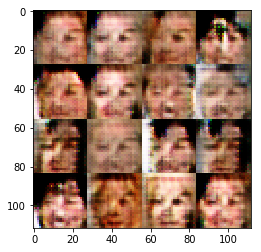

Epoch 1/2... Discriminator Loss: 1.0073 ... Generator Loss: 0.7725
Epoch 1/2... Discriminator Loss: 1.0095 ... Generator Loss: 0.8992
Epoch 1/2... Discriminator Loss: 0.8075 ... Generator Loss: 1.6570
Epoch 1/2... Discriminator Loss: 1.5014 ... Generator Loss: 0.3974
Epoch 1/2... Discriminator Loss: 0.7249 ... Generator Loss: 1.0527
Epoch 1/2... Discriminator Loss: 1.2721 ... Generator Loss: 0.4551
Epoch 1/2... Discriminator Loss: 0.8293 ... Generator Loss: 1.0782
Epoch 1/2... Discriminator Loss: 0.8578 ... Generator Loss: 1.0744
Epoch 1/2... Discriminator Loss: 1.1845 ... Generator Loss: 0.6522
Epoch 1/2... Discriminator Loss: 1.3807 ... Generator Loss: 0.6284


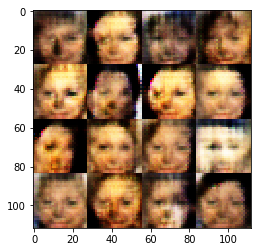

Epoch 1/2... Discriminator Loss: 1.1817 ... Generator Loss: 0.8076
Epoch 1/2... Discriminator Loss: 1.0290 ... Generator Loss: 0.7156
Epoch 1/2... Discriminator Loss: 1.1046 ... Generator Loss: 2.9287
Epoch 1/2... Discriminator Loss: 1.0129 ... Generator Loss: 0.6874
Epoch 1/2... Discriminator Loss: 1.1095 ... Generator Loss: 1.6789
Epoch 1/2... Discriminator Loss: 1.2767 ... Generator Loss: 0.6638
Epoch 1/2... Discriminator Loss: 0.9256 ... Generator Loss: 0.9055
Epoch 1/2... Discriminator Loss: 1.2589 ... Generator Loss: 0.6685
Epoch 1/2... Discriminator Loss: 1.1615 ... Generator Loss: 0.7250
Epoch 1/2... Discriminator Loss: 1.7094 ... Generator Loss: 0.4546


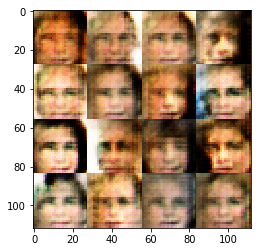

Epoch 1/2... Discriminator Loss: 1.0684 ... Generator Loss: 0.6924
Epoch 1/2... Discriminator Loss: 1.1719 ... Generator Loss: 1.7327
Epoch 1/2... Discriminator Loss: 1.4583 ... Generator Loss: 0.3874
Epoch 1/2... Discriminator Loss: 1.8515 ... Generator Loss: 0.2479
Epoch 1/2... Discriminator Loss: 1.1295 ... Generator Loss: 1.6646
Epoch 1/2... Discriminator Loss: 1.6319 ... Generator Loss: 0.2964
Epoch 1/2... Discriminator Loss: 1.1737 ... Generator Loss: 0.4554
Epoch 1/2... Discriminator Loss: 0.5022 ... Generator Loss: 1.4944
Epoch 1/2... Discriminator Loss: 1.0926 ... Generator Loss: 0.6661
Epoch 1/2... Discriminator Loss: 1.3043 ... Generator Loss: 0.5347


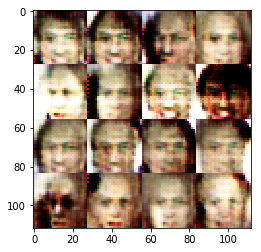

Epoch 1/2... Discriminator Loss: 1.0187 ... Generator Loss: 0.9370
Epoch 1/2... Discriminator Loss: 1.0085 ... Generator Loss: 1.5951
Epoch 1/2... Discriminator Loss: 1.1719 ... Generator Loss: 0.6483
Epoch 1/2... Discriminator Loss: 1.2602 ... Generator Loss: 0.4712
Epoch 1/2... Discriminator Loss: 0.9097 ... Generator Loss: 1.9352
Epoch 1/2... Discriminator Loss: 0.9139 ... Generator Loss: 0.9269
Epoch 1/2... Discriminator Loss: 1.0296 ... Generator Loss: 0.7289
Epoch 1/2... Discriminator Loss: 0.8640 ... Generator Loss: 2.1175
Epoch 1/2... Discriminator Loss: 0.6797 ... Generator Loss: 1.6234
Epoch 1/2... Discriminator Loss: 0.7552 ... Generator Loss: 1.1644


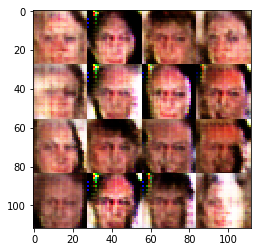

Epoch 1/2... Discriminator Loss: 1.0857 ... Generator Loss: 0.7295
Epoch 1/2... Discriminator Loss: 0.8934 ... Generator Loss: 0.7891
Epoch 1/2... Discriminator Loss: 0.7819 ... Generator Loss: 1.0383
Epoch 1/2... Discriminator Loss: 0.8767 ... Generator Loss: 1.2822
Epoch 1/2... Discriminator Loss: 0.9506 ... Generator Loss: 1.7915
Epoch 1/2... Discriminator Loss: 1.5052 ... Generator Loss: 2.4349
Epoch 1/2... Discriminator Loss: 0.7951 ... Generator Loss: 1.0805
Epoch 1/2... Discriminator Loss: 0.8536 ... Generator Loss: 1.2935
Epoch 1/2... Discriminator Loss: 0.8381 ... Generator Loss: 1.4068
Epoch 1/2... Discriminator Loss: 0.7921 ... Generator Loss: 0.9788


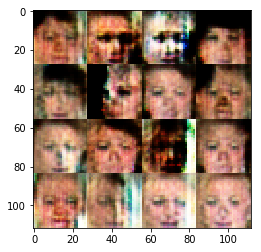

Epoch 1/2... Discriminator Loss: 0.5945 ... Generator Loss: 1.7751
Epoch 1/2... Discriminator Loss: 1.0295 ... Generator Loss: 0.6964
Epoch 1/2... Discriminator Loss: 0.8956 ... Generator Loss: 2.1007
Epoch 1/2... Discriminator Loss: 0.8063 ... Generator Loss: 2.1509
Epoch 1/2... Discriminator Loss: 1.2778 ... Generator Loss: 0.4334
Epoch 1/2... Discriminator Loss: 2.1234 ... Generator Loss: 0.1679
Epoch 1/2... Discriminator Loss: 1.0991 ... Generator Loss: 0.8513
Epoch 1/2... Discriminator Loss: 0.9145 ... Generator Loss: 0.7552
Epoch 1/2... Discriminator Loss: 1.1224 ... Generator Loss: 0.5914
Epoch 1/2... Discriminator Loss: 1.1882 ... Generator Loss: 0.5274


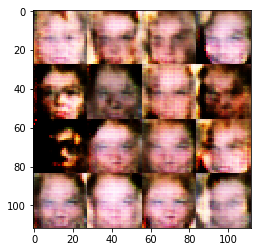

Epoch 1/2... Discriminator Loss: 1.0601 ... Generator Loss: 0.5725
Epoch 1/2... Discriminator Loss: 1.0571 ... Generator Loss: 1.2463
Epoch 1/2... Discriminator Loss: 0.9990 ... Generator Loss: 2.1193
Epoch 1/2... Discriminator Loss: 1.4443 ... Generator Loss: 0.4132
Epoch 1/2... Discriminator Loss: 1.2609 ... Generator Loss: 0.6268
Epoch 1/2... Discriminator Loss: 1.2072 ... Generator Loss: 0.5210
Epoch 1/2... Discriminator Loss: 1.1433 ... Generator Loss: 0.9009
Epoch 1/2... Discriminator Loss: 0.8415 ... Generator Loss: 1.3719
Epoch 1/2... Discriminator Loss: 1.4591 ... Generator Loss: 0.3632
Epoch 1/2... Discriminator Loss: 1.0916 ... Generator Loss: 1.7322


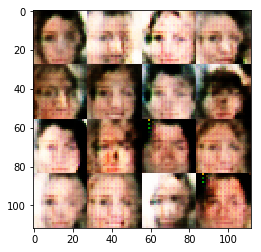

Epoch 1/2... Discriminator Loss: 1.1886 ... Generator Loss: 2.5594
Epoch 1/2... Discriminator Loss: 1.1964 ... Generator Loss: 0.5608
Epoch 1/2... Discriminator Loss: 1.2775 ... Generator Loss: 1.4443
Epoch 1/2... Discriminator Loss: 1.1203 ... Generator Loss: 0.7043
Epoch 1/2... Discriminator Loss: 1.4370 ... Generator Loss: 2.2350
Epoch 1/2... Discriminator Loss: 0.6807 ... Generator Loss: 1.4383
Epoch 1/2... Discriminator Loss: 0.9063 ... Generator Loss: 0.8676
Epoch 1/2... Discriminator Loss: 0.6692 ... Generator Loss: 1.2351
Epoch 1/2... Discriminator Loss: 1.4874 ... Generator Loss: 0.3528
Epoch 1/2... Discriminator Loss: 1.5849 ... Generator Loss: 0.3828


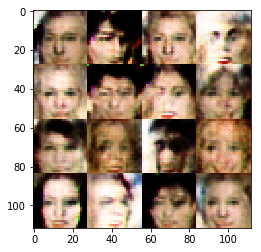

Epoch 1/2... Discriminator Loss: 1.9558 ... Generator Loss: 0.1975
Epoch 1/2... Discriminator Loss: 1.0751 ... Generator Loss: 0.6272
Epoch 1/2... Discriminator Loss: 0.6763 ... Generator Loss: 0.9880
Epoch 1/2... Discriminator Loss: 1.2903 ... Generator Loss: 0.5424
Epoch 1/2... Discriminator Loss: 1.0123 ... Generator Loss: 0.8669
Epoch 1/2... Discriminator Loss: 1.2628 ... Generator Loss: 0.3974
Epoch 1/2... Discriminator Loss: 1.2297 ... Generator Loss: 0.5082
Epoch 1/2... Discriminator Loss: 1.3624 ... Generator Loss: 0.4503
Epoch 1/2... Discriminator Loss: 0.8650 ... Generator Loss: 1.4621
Epoch 1/2... Discriminator Loss: 0.8250 ... Generator Loss: 1.0907


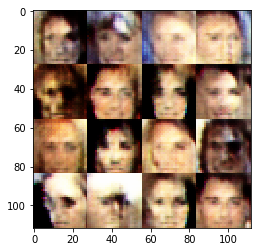

Epoch 1/2... Discriminator Loss: 1.0362 ... Generator Loss: 0.8177
Epoch 1/2... Discriminator Loss: 1.0765 ... Generator Loss: 1.5422
Epoch 1/2... Discriminator Loss: 0.6954 ... Generator Loss: 1.2015
Epoch 1/2... Discriminator Loss: 0.7309 ... Generator Loss: 1.1233
Epoch 1/2... Discriminator Loss: 1.0933 ... Generator Loss: 1.1631
Epoch 1/2... Discriminator Loss: 1.0569 ... Generator Loss: 2.6060
Epoch 1/2... Discriminator Loss: 1.2283 ... Generator Loss: 0.5554
Epoch 1/2... Discriminator Loss: 0.6998 ... Generator Loss: 1.2932
Epoch 1/2... Discriminator Loss: 0.8138 ... Generator Loss: 1.0214
Epoch 1/2... Discriminator Loss: 1.1173 ... Generator Loss: 0.5718


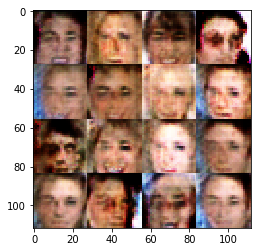

Epoch 1/2... Discriminator Loss: 0.7189 ... Generator Loss: 2.1997
Epoch 1/2... Discriminator Loss: 1.4689 ... Generator Loss: 0.3691
Epoch 1/2... Discriminator Loss: 1.2120 ... Generator Loss: 0.5680
Epoch 1/2... Discriminator Loss: 1.3998 ... Generator Loss: 1.5510
Epoch 1/2... Discriminator Loss: 0.9544 ... Generator Loss: 0.7104
Epoch 1/2... Discriminator Loss: 0.6725 ... Generator Loss: 1.2737
Epoch 1/2... Discriminator Loss: 0.7857 ... Generator Loss: 0.9122
Epoch 1/2... Discriminator Loss: 0.8743 ... Generator Loss: 2.1444
Epoch 1/2... Discriminator Loss: 0.7491 ... Generator Loss: 0.9213
Epoch 1/2... Discriminator Loss: 0.6421 ... Generator Loss: 1.1354


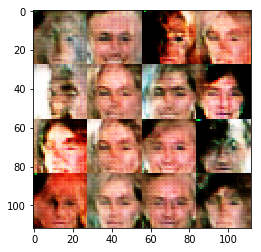

Epoch 1/2... Discriminator Loss: 0.7045 ... Generator Loss: 1.2905
Epoch 1/2... Discriminator Loss: 1.1248 ... Generator Loss: 0.6667
Epoch 1/2... Discriminator Loss: 0.8816 ... Generator Loss: 0.7362
Epoch 1/2... Discriminator Loss: 1.3787 ... Generator Loss: 2.6117
Epoch 1/2... Discriminator Loss: 1.1002 ... Generator Loss: 0.6018
Epoch 1/2... Discriminator Loss: 0.6731 ... Generator Loss: 1.5573
Epoch 1/2... Discriminator Loss: 0.7709 ... Generator Loss: 1.6221
Epoch 1/2... Discriminator Loss: 1.0707 ... Generator Loss: 0.6696
Epoch 1/2... Discriminator Loss: 0.8333 ... Generator Loss: 1.1116
Epoch 1/2... Discriminator Loss: 1.0663 ... Generator Loss: 0.6507


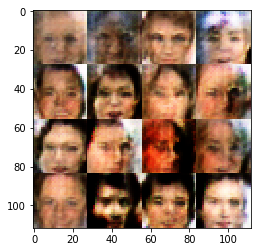

Epoch 1/2... Discriminator Loss: 1.2576 ... Generator Loss: 0.4334
Epoch 1/2... Discriminator Loss: 0.9101 ... Generator Loss: 1.3632
Epoch 1/2... Discriminator Loss: 1.0061 ... Generator Loss: 0.6647
Epoch 1/2... Discriminator Loss: 0.6826 ... Generator Loss: 1.3609
Epoch 1/2... Discriminator Loss: 1.2170 ... Generator Loss: 0.5087
Epoch 1/2... Discriminator Loss: 1.2054 ... Generator Loss: 0.6304
Epoch 1/2... Discriminator Loss: 1.4179 ... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 0.8148 ... Generator Loss: 1.6062
Epoch 1/2... Discriminator Loss: 1.0114 ... Generator Loss: 1.9110
Epoch 1/2... Discriminator Loss: 0.9800 ... Generator Loss: 0.8741


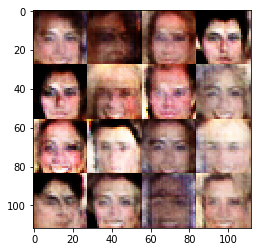

Epoch 1/2... Discriminator Loss: 1.1486 ... Generator Loss: 0.8805
Epoch 1/2... Discriminator Loss: 0.8110 ... Generator Loss: 0.9649
Epoch 1/2... Discriminator Loss: 1.0739 ... Generator Loss: 0.6487
Epoch 1/2... Discriminator Loss: 1.2397 ... Generator Loss: 0.5367
Epoch 1/2... Discriminator Loss: 0.7753 ... Generator Loss: 0.8980
Epoch 1/2... Discriminator Loss: 0.9724 ... Generator Loss: 1.3728
Epoch 1/2... Discriminator Loss: 1.5290 ... Generator Loss: 0.3281
Epoch 1/2... Discriminator Loss: 1.6295 ... Generator Loss: 0.2811
Epoch 1/2... Discriminator Loss: 1.0682 ... Generator Loss: 0.6152
Epoch 1/2... Discriminator Loss: 0.7616 ... Generator Loss: 1.0444


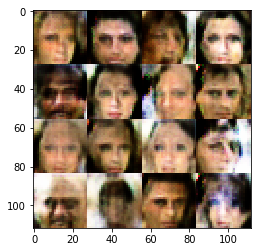

Epoch 1/2... Discriminator Loss: 1.1029 ... Generator Loss: 0.5478
Epoch 1/2... Discriminator Loss: 1.3141 ... Generator Loss: 0.5515
Epoch 1/2... Discriminator Loss: 0.9561 ... Generator Loss: 0.7247
Epoch 1/2... Discriminator Loss: 1.3440 ... Generator Loss: 0.4551
Epoch 1/2... Discriminator Loss: 0.7741 ... Generator Loss: 1.1087
Epoch 1/2... Discriminator Loss: 1.0065 ... Generator Loss: 1.3908
Epoch 1/2... Discriminator Loss: 1.3085 ... Generator Loss: 0.4636
Epoch 1/2... Discriminator Loss: 0.9007 ... Generator Loss: 0.7784
Epoch 1/2... Discriminator Loss: 1.4136 ... Generator Loss: 0.3846
Epoch 1/2... Discriminator Loss: 0.8561 ... Generator Loss: 1.5695


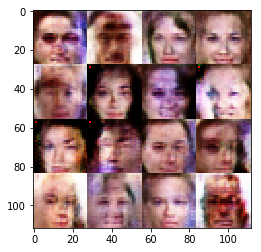

Epoch 1/2... Discriminator Loss: 1.2868 ... Generator Loss: 0.4228
Epoch 1/2... Discriminator Loss: 0.8749 ... Generator Loss: 0.8953
Epoch 1/2... Discriminator Loss: 0.6620 ... Generator Loss: 1.3344
Epoch 1/2... Discriminator Loss: 0.7813 ... Generator Loss: 0.9803
Epoch 1/2... Discriminator Loss: 1.1411 ... Generator Loss: 0.6284
Epoch 1/2... Discriminator Loss: 0.9899 ... Generator Loss: 1.2701
Epoch 1/2... Discriminator Loss: 0.9158 ... Generator Loss: 1.0066
Epoch 1/2... Discriminator Loss: 1.3962 ... Generator Loss: 0.3653
Epoch 1/2... Discriminator Loss: 1.1002 ... Generator Loss: 0.5281
Epoch 1/2... Discriminator Loss: 1.1081 ... Generator Loss: 1.7766


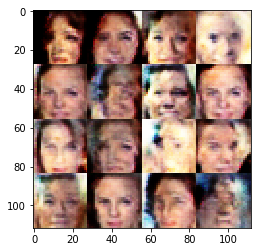

Epoch 1/2... Discriminator Loss: 1.2160 ... Generator Loss: 0.5992
Epoch 1/2... Discriminator Loss: 0.9921 ... Generator Loss: 0.8237
Epoch 1/2... Discriminator Loss: 1.6357 ... Generator Loss: 2.8943
Epoch 1/2... Discriminator Loss: 1.0256 ... Generator Loss: 0.8810
Epoch 1/2... Discriminator Loss: 0.8551 ... Generator Loss: 0.9282
Epoch 1/2... Discriminator Loss: 1.3202 ... Generator Loss: 0.4737
Epoch 1/2... Discriminator Loss: 1.4979 ... Generator Loss: 0.3965
Epoch 1/2... Discriminator Loss: 0.8762 ... Generator Loss: 0.9751
Epoch 1/2... Discriminator Loss: 1.2363 ... Generator Loss: 0.5667
Epoch 1/2... Discriminator Loss: 1.1532 ... Generator Loss: 0.7573


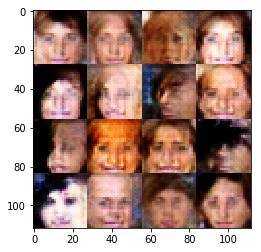

Epoch 1/2... Discriminator Loss: 0.8886 ... Generator Loss: 1.2042
Epoch 1/2... Discriminator Loss: 0.7882 ... Generator Loss: 1.0655
Epoch 1/2... Discriminator Loss: 0.8622 ... Generator Loss: 0.9393
Epoch 1/2... Discriminator Loss: 0.8148 ... Generator Loss: 1.8400
Epoch 1/2... Discriminator Loss: 0.8861 ... Generator Loss: 1.2066
Epoch 1/2... Discriminator Loss: 1.3258 ... Generator Loss: 0.5055
Epoch 1/2... Discriminator Loss: 1.1727 ... Generator Loss: 0.4828
Epoch 1/2... Discriminator Loss: 1.3316 ... Generator Loss: 0.4306
Epoch 1/2... Discriminator Loss: 1.5871 ... Generator Loss: 0.3412
Epoch 1/2... Discriminator Loss: 1.1918 ... Generator Loss: 0.4925


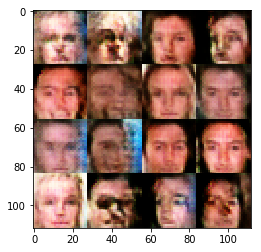

Epoch 1/2... Discriminator Loss: 0.8365 ... Generator Loss: 1.4901
Epoch 1/2... Discriminator Loss: 1.1749 ... Generator Loss: 0.5375
Epoch 1/2... Discriminator Loss: 0.7002 ... Generator Loss: 1.3461
Epoch 1/2... Discriminator Loss: 1.4756 ... Generator Loss: 0.3479
Epoch 1/2... Discriminator Loss: 1.1602 ... Generator Loss: 0.7391
Epoch 1/2... Discriminator Loss: 0.7904 ... Generator Loss: 1.3348
Epoch 1/2... Discriminator Loss: 0.6024 ... Generator Loss: 1.2194
Epoch 1/2... Discriminator Loss: 1.1520 ... Generator Loss: 0.6169
Epoch 1/2... Discriminator Loss: 0.9145 ... Generator Loss: 0.8515
Epoch 1/2... Discriminator Loss: 1.0777 ... Generator Loss: 0.6219


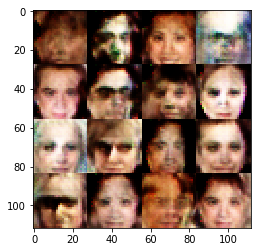

Epoch 1/2... Discriminator Loss: 0.8105 ... Generator Loss: 1.7523
Epoch 1/2... Discriminator Loss: 0.7715 ... Generator Loss: 0.9003
Epoch 1/2... Discriminator Loss: 1.4408 ... Generator Loss: 0.4048
Epoch 1/2... Discriminator Loss: 1.0766 ... Generator Loss: 0.6703
Epoch 1/2... Discriminator Loss: 1.4403 ... Generator Loss: 0.3725
Epoch 1/2... Discriminator Loss: 1.3143 ... Generator Loss: 0.4334
Epoch 1/2... Discriminator Loss: 0.6925 ... Generator Loss: 1.7699
Epoch 1/2... Discriminator Loss: 0.5986 ... Generator Loss: 1.2701
Epoch 1/2... Discriminator Loss: 1.8502 ... Generator Loss: 0.2111
Epoch 1/2... Discriminator Loss: 1.0731 ... Generator Loss: 1.8462


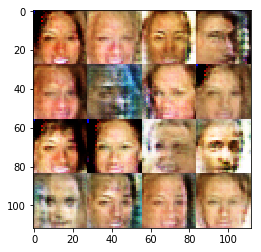

Epoch 1/2... Discriminator Loss: 0.6915 ... Generator Loss: 1.3995
Epoch 1/2... Discriminator Loss: 1.1194 ... Generator Loss: 0.5710
Epoch 1/2... Discriminator Loss: 1.3791 ... Generator Loss: 0.4088
Epoch 1/2... Discriminator Loss: 1.0087 ... Generator Loss: 1.1710
Epoch 1/2... Discriminator Loss: 0.8273 ... Generator Loss: 1.8485
Epoch 1/2... Discriminator Loss: 1.0251 ... Generator Loss: 0.6680
Epoch 1/2... Discriminator Loss: 0.9315 ... Generator Loss: 2.1830
Epoch 1/2... Discriminator Loss: 1.0429 ... Generator Loss: 0.6670
Epoch 1/2... Discriminator Loss: 1.6402 ... Generator Loss: 0.2709
Epoch 1/2... Discriminator Loss: 0.9394 ... Generator Loss: 0.9454


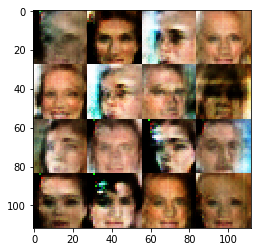

Epoch 1/2... Discriminator Loss: 2.4471 ... Generator Loss: 0.1222
Epoch 1/2... Discriminator Loss: 0.8129 ... Generator Loss: 1.1646
Epoch 1/2... Discriminator Loss: 1.2709 ... Generator Loss: 0.5018
Epoch 1/2... Discriminator Loss: 1.2708 ... Generator Loss: 0.4563
Epoch 1/2... Discriminator Loss: 1.0070 ... Generator Loss: 0.7264
Epoch 1/2... Discriminator Loss: 1.4957 ... Generator Loss: 0.3976
Epoch 1/2... Discriminator Loss: 1.2695 ... Generator Loss: 0.8261
Epoch 1/2... Discriminator Loss: 1.2141 ... Generator Loss: 0.5416
Epoch 1/2... Discriminator Loss: 0.8993 ... Generator Loss: 1.1286
Epoch 1/2... Discriminator Loss: 1.3754 ... Generator Loss: 0.3805


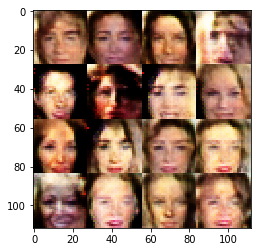

Epoch 1/2... Discriminator Loss: 0.8569 ... Generator Loss: 0.9445
Epoch 1/2... Discriminator Loss: 1.1094 ... Generator Loss: 0.6289
Epoch 1/2... Discriminator Loss: 1.1178 ... Generator Loss: 0.7296
Epoch 1/2... Discriminator Loss: 1.2635 ... Generator Loss: 0.5510
Epoch 1/2... Discriminator Loss: 1.2122 ... Generator Loss: 0.5915
Epoch 1/2... Discriminator Loss: 0.7645 ... Generator Loss: 2.1441
Epoch 1/2... Discriminator Loss: 0.9228 ... Generator Loss: 1.0554
Epoch 1/2... Discriminator Loss: 0.8094 ... Generator Loss: 1.2991
Epoch 1/2... Discriminator Loss: 0.8245 ... Generator Loss: 0.9883
Epoch 1/2... Discriminator Loss: 1.0924 ... Generator Loss: 0.8680


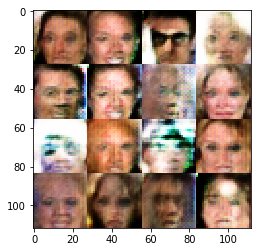

Epoch 1/2... Discriminator Loss: 1.8017 ... Generator Loss: 0.2334
Epoch 1/2... Discriminator Loss: 0.7785 ... Generator Loss: 1.2289
Epoch 1/2... Discriminator Loss: 0.6788 ... Generator Loss: 1.2326
Epoch 1/2... Discriminator Loss: 1.2586 ... Generator Loss: 0.4521
Epoch 1/2... Discriminator Loss: 1.0232 ... Generator Loss: 0.8251
Epoch 1/2... Discriminator Loss: 1.9912 ... Generator Loss: 0.1984
Epoch 1/2... Discriminator Loss: 1.2465 ... Generator Loss: 0.4916
Epoch 1/2... Discriminator Loss: 1.0818 ... Generator Loss: 0.6457
Epoch 1/2... Discriminator Loss: 1.0844 ... Generator Loss: 0.5737
Epoch 1/2... Discriminator Loss: 0.8322 ... Generator Loss: 0.9999


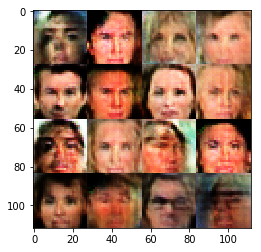

Epoch 1/2... Discriminator Loss: 0.7843 ... Generator Loss: 1.1118
Epoch 1/2... Discriminator Loss: 1.2373 ... Generator Loss: 0.5538
Epoch 1/2... Discriminator Loss: 1.2169 ... Generator Loss: 0.5770
Epoch 1/2... Discriminator Loss: 0.9965 ... Generator Loss: 0.6971
Epoch 1/2... Discriminator Loss: 0.7439 ... Generator Loss: 1.0069
Epoch 1/2... Discriminator Loss: 1.1898 ... Generator Loss: 0.5602
Epoch 1/2... Discriminator Loss: 0.8974 ... Generator Loss: 0.8590
Epoch 1/2... Discriminator Loss: 0.9266 ... Generator Loss: 1.5502
Epoch 1/2... Discriminator Loss: 1.1449 ... Generator Loss: 0.5010
Epoch 1/2... Discriminator Loss: 1.1751 ... Generator Loss: 0.5027


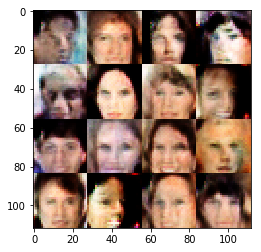

Epoch 1/2... Discriminator Loss: 1.1406 ... Generator Loss: 0.7311
Epoch 1/2... Discriminator Loss: 1.0064 ... Generator Loss: 0.5801
Epoch 1/2... Discriminator Loss: 1.4876 ... Generator Loss: 0.4056
Epoch 1/2... Discriminator Loss: 0.7875 ... Generator Loss: 1.1236
Epoch 1/2... Discriminator Loss: 1.0852 ... Generator Loss: 1.1195
Epoch 1/2... Discriminator Loss: 0.8531 ... Generator Loss: 0.9320
Epoch 1/2... Discriminator Loss: 1.4474 ... Generator Loss: 0.5368
Epoch 1/2... Discriminator Loss: 0.8367 ... Generator Loss: 1.4552
Epoch 1/2... Discriminator Loss: 0.8701 ... Generator Loss: 1.3970
Epoch 1/2... Discriminator Loss: 1.6918 ... Generator Loss: 0.2966


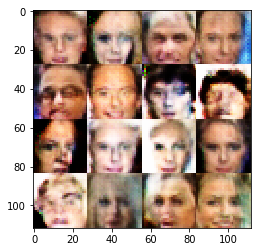

Epoch 1/2... Discriminator Loss: 1.4797 ... Generator Loss: 0.3134
Epoch 1/2... Discriminator Loss: 1.6325 ... Generator Loss: 2.8447
Epoch 1/2... Discriminator Loss: 0.9214 ... Generator Loss: 0.8418
Epoch 1/2... Discriminator Loss: 0.8629 ... Generator Loss: 1.0633
Epoch 1/2... Discriminator Loss: 0.8784 ... Generator Loss: 1.2013
Epoch 1/2... Discriminator Loss: 1.0062 ... Generator Loss: 0.9816
Epoch 1/2... Discriminator Loss: 1.2235 ... Generator Loss: 0.5181
Epoch 1/2... Discriminator Loss: 0.8057 ... Generator Loss: 1.2467
Epoch 1/2... Discriminator Loss: 1.1535 ... Generator Loss: 0.9214
Epoch 1/2... Discriminator Loss: 1.0089 ... Generator Loss: 1.4602


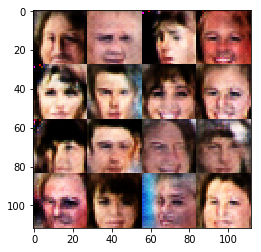

Epoch 1/2... Discriminator Loss: 0.8393 ... Generator Loss: 0.7813
Epoch 1/2... Discriminator Loss: 1.1030 ... Generator Loss: 0.6677
Epoch 1/2... Discriminator Loss: 1.2230 ... Generator Loss: 0.7918
Epoch 1/2... Discriminator Loss: 1.5042 ... Generator Loss: 0.4070
Epoch 1/2... Discriminator Loss: 0.7965 ... Generator Loss: 0.9277
Epoch 1/2... Discriminator Loss: 1.5386 ... Generator Loss: 0.3249
Epoch 1/2... Discriminator Loss: 0.8159 ... Generator Loss: 1.0451
Epoch 1/2... Discriminator Loss: 0.9438 ... Generator Loss: 1.1283
Epoch 1/2... Discriminator Loss: 0.9625 ... Generator Loss: 0.8280
Epoch 1/2... Discriminator Loss: 0.8721 ... Generator Loss: 0.7456


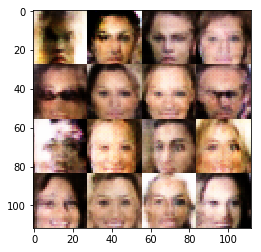

Epoch 1/2... Discriminator Loss: 1.0981 ... Generator Loss: 1.1159
Epoch 1/2... Discriminator Loss: 1.3630 ... Generator Loss: 0.4355
Epoch 1/2... Discriminator Loss: 0.6895 ... Generator Loss: 1.3839
Epoch 1/2... Discriminator Loss: 0.9758 ... Generator Loss: 0.7269
Epoch 1/2... Discriminator Loss: 1.4436 ... Generator Loss: 0.3731
Epoch 1/2... Discriminator Loss: 0.7506 ... Generator Loss: 1.2073
Epoch 1/2... Discriminator Loss: 1.5895 ... Generator Loss: 0.2906
Epoch 1/2... Discriminator Loss: 1.1164 ... Generator Loss: 0.5516
Epoch 1/2... Discriminator Loss: 1.5077 ... Generator Loss: 0.4255
Epoch 1/2... Discriminator Loss: 1.0298 ... Generator Loss: 1.0200


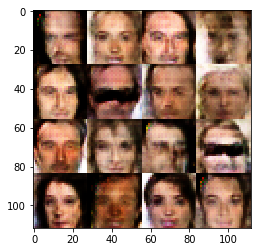

Epoch 1/2... Discriminator Loss: 0.9851 ... Generator Loss: 0.7687
Epoch 1/2... Discriminator Loss: 1.4412 ... Generator Loss: 0.3734
Epoch 1/2... Discriminator Loss: 1.4082 ... Generator Loss: 0.4149
Epoch 1/2... Discriminator Loss: 0.9534 ... Generator Loss: 1.1567
Epoch 1/2... Discriminator Loss: 1.1456 ... Generator Loss: 0.7799
Epoch 1/2... Discriminator Loss: 1.2104 ... Generator Loss: 0.6606
Epoch 1/2... Discriminator Loss: 0.8427 ... Generator Loss: 0.8231
Epoch 1/2... Discriminator Loss: 0.9325 ... Generator Loss: 0.7146
Epoch 1/2... Discriminator Loss: 0.9175 ... Generator Loss: 0.6707
Epoch 1/2... Discriminator Loss: 0.6918 ... Generator Loss: 1.2713


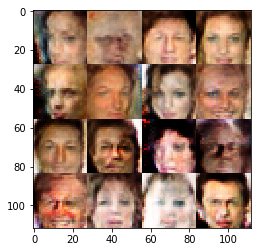

Epoch 1/2... Discriminator Loss: 1.0535 ... Generator Loss: 0.6799
Epoch 1/2... Discriminator Loss: 1.3288 ... Generator Loss: 0.5102
Epoch 1/2... Discriminator Loss: 0.7613 ... Generator Loss: 1.1783
Epoch 1/2... Discriminator Loss: 0.8236 ... Generator Loss: 0.9050
Epoch 1/2... Discriminator Loss: 1.3838 ... Generator Loss: 0.4135
Epoch 1/2... Discriminator Loss: 0.9714 ... Generator Loss: 0.7394
Epoch 1/2... Discriminator Loss: 1.0701 ... Generator Loss: 1.0341
Epoch 1/2... Discriminator Loss: 1.7063 ... Generator Loss: 0.2492
Epoch 1/2... Discriminator Loss: 1.6651 ... Generator Loss: 0.2927
Epoch 1/2... Discriminator Loss: 1.3095 ... Generator Loss: 0.4389


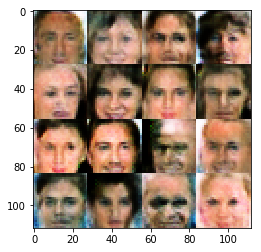

Epoch 1/2... Discriminator Loss: 1.0581 ... Generator Loss: 1.3335
Epoch 1/2... Discriminator Loss: 1.0561 ... Generator Loss: 1.3483
Epoch 1/2... Discriminator Loss: 1.1910 ... Generator Loss: 0.5406
Epoch 1/2... Discriminator Loss: 1.0129 ... Generator Loss: 0.6141
Epoch 1/2... Discriminator Loss: 0.9314 ... Generator Loss: 1.1639
Epoch 1/2... Discriminator Loss: 0.9425 ... Generator Loss: 1.1723
Epoch 1/2... Discriminator Loss: 1.0543 ... Generator Loss: 0.7455
Epoch 1/2... Discriminator Loss: 1.4496 ... Generator Loss: 0.3594
Epoch 1/2... Discriminator Loss: 1.0194 ... Generator Loss: 0.6251
Epoch 1/2... Discriminator Loss: 1.2929 ... Generator Loss: 0.7960


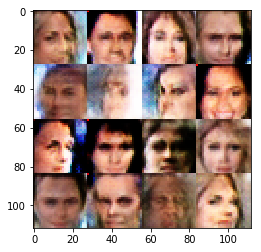

Epoch 1/2... Discriminator Loss: 1.3886 ... Generator Loss: 0.4199
Epoch 1/2... Discriminator Loss: 1.0014 ... Generator Loss: 0.8930
Epoch 1/2... Discriminator Loss: 1.0823 ... Generator Loss: 1.0777
Epoch 1/2... Discriminator Loss: 1.3297 ... Generator Loss: 0.4744
Epoch 1/2... Discriminator Loss: 1.0208 ... Generator Loss: 0.7695
Epoch 1/2... Discriminator Loss: 1.5475 ... Generator Loss: 0.3132
Epoch 1/2... Discriminator Loss: 1.2457 ... Generator Loss: 0.5140
Epoch 1/2... Discriminator Loss: 0.8895 ... Generator Loss: 2.0414
Epoch 1/2... Discriminator Loss: 0.8536 ... Generator Loss: 1.1652
Epoch 1/2... Discriminator Loss: 1.1158 ... Generator Loss: 0.6200


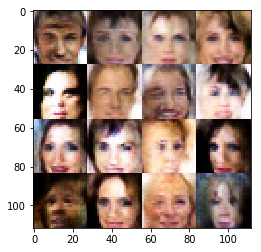

Epoch 1/2... Discriminator Loss: 1.3042 ... Generator Loss: 0.4667
Epoch 1/2... Discriminator Loss: 0.9768 ... Generator Loss: 0.6508
Epoch 1/2... Discriminator Loss: 1.0950 ... Generator Loss: 0.5274
Epoch 1/2... Discriminator Loss: 1.3030 ... Generator Loss: 0.4109
Epoch 1/2... Discriminator Loss: 0.6450 ... Generator Loss: 1.1830
Epoch 1/2... Discriminator Loss: 1.5553 ... Generator Loss: 0.3483
Epoch 1/2... Discriminator Loss: 1.2159 ... Generator Loss: 0.4644
Epoch 1/2... Discriminator Loss: 0.6927 ... Generator Loss: 1.3845
Epoch 1/2... Discriminator Loss: 1.2004 ... Generator Loss: 0.4895
Epoch 1/2... Discriminator Loss: 1.1066 ... Generator Loss: 1.0937


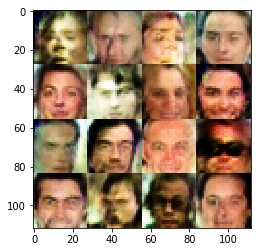

Epoch 1/2... Discriminator Loss: 1.0330 ... Generator Loss: 0.6023
Epoch 1/2... Discriminator Loss: 1.1804 ... Generator Loss: 0.4725
Epoch 1/2... Discriminator Loss: 0.9498 ... Generator Loss: 0.8633
Epoch 1/2... Discriminator Loss: 1.1499 ... Generator Loss: 0.5057
Epoch 1/2... Discriminator Loss: 0.9390 ... Generator Loss: 0.8738
Epoch 1/2... Discriminator Loss: 0.7849 ... Generator Loss: 1.6683
Epoch 1/2... Discriminator Loss: 1.0807 ... Generator Loss: 0.6085
Epoch 1/2... Discriminator Loss: 1.0166 ... Generator Loss: 0.6535
Epoch 1/2... Discriminator Loss: 1.2291 ... Generator Loss: 0.4370
Epoch 1/2... Discriminator Loss: 1.0330 ... Generator Loss: 0.6968


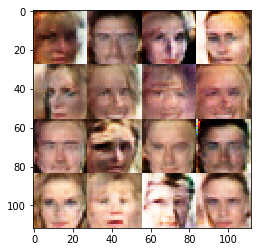

Epoch 1/2... Discriminator Loss: 0.9542 ... Generator Loss: 0.6811
Epoch 1/2... Discriminator Loss: 1.1542 ... Generator Loss: 0.5892
Epoch 1/2... Discriminator Loss: 1.1136 ... Generator Loss: 0.6293
Epoch 1/2... Discriminator Loss: 1.8055 ... Generator Loss: 0.2594
Epoch 1/2... Discriminator Loss: 1.0246 ... Generator Loss: 0.6649
Epoch 1/2... Discriminator Loss: 0.6568 ... Generator Loss: 1.1663
Epoch 1/2... Discriminator Loss: 1.1782 ... Generator Loss: 0.5561
Epoch 1/2... Discriminator Loss: 0.9452 ... Generator Loss: 1.0938
Epoch 1/2... Discriminator Loss: 0.8019 ... Generator Loss: 1.2637
Epoch 1/2... Discriminator Loss: 0.9355 ... Generator Loss: 0.8685


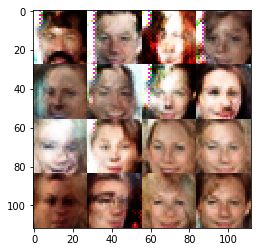

Epoch 1/2... Discriminator Loss: 0.9680 ... Generator Loss: 0.7517
Epoch 1/2... Discriminator Loss: 0.6863 ... Generator Loss: 1.3735
Epoch 1/2... Discriminator Loss: 0.7106 ... Generator Loss: 1.0543
Epoch 1/2... Discriminator Loss: 2.2182 ... Generator Loss: 0.1385
Epoch 1/2... Discriminator Loss: 0.8373 ... Generator Loss: 1.3105
Epoch 1/2... Discriminator Loss: 1.0901 ... Generator Loss: 0.6872
Epoch 1/2... Discriminator Loss: 1.0906 ... Generator Loss: 0.5820
Epoch 1/2... Discriminator Loss: 1.1543 ... Generator Loss: 0.5759
Epoch 1/2... Discriminator Loss: 1.2460 ... Generator Loss: 0.5505
Epoch 1/2... Discriminator Loss: 0.9547 ... Generator Loss: 0.8860


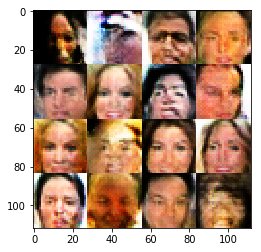

Epoch 1/2... Discriminator Loss: 1.1616 ... Generator Loss: 0.5544
Epoch 1/2... Discriminator Loss: 1.3524 ... Generator Loss: 0.4264
Epoch 1/2... Discriminator Loss: 1.2822 ... Generator Loss: 0.4509
Epoch 1/2... Discriminator Loss: 1.1150 ... Generator Loss: 0.6397
Epoch 1/2... Discriminator Loss: 0.9777 ... Generator Loss: 1.4330
Epoch 1/2... Discriminator Loss: 1.3007 ... Generator Loss: 0.4388
Epoch 1/2... Discriminator Loss: 0.8117 ... Generator Loss: 1.5093
Epoch 1/2... Discriminator Loss: 1.0588 ... Generator Loss: 0.8208
Epoch 1/2... Discriminator Loss: 0.9907 ... Generator Loss: 0.7029
Epoch 1/2... Discriminator Loss: 0.7935 ... Generator Loss: 1.2958


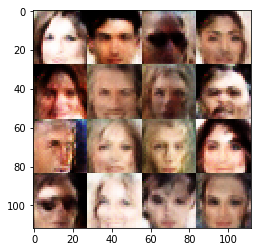

Epoch 1/2... Discriminator Loss: 1.3102 ... Generator Loss: 0.6192
Epoch 1/2... Discriminator Loss: 1.2634 ... Generator Loss: 0.8467
Epoch 1/2... Discriminator Loss: 0.9298 ... Generator Loss: 0.7921
Epoch 1/2... Discriminator Loss: 1.1719 ... Generator Loss: 0.9905
Epoch 1/2... Discriminator Loss: 1.0572 ... Generator Loss: 0.6708
Epoch 1/2... Discriminator Loss: 1.1640 ... Generator Loss: 0.5723
Epoch 1/2... Discriminator Loss: 1.0953 ... Generator Loss: 0.5865
Epoch 1/2... Discriminator Loss: 1.0290 ... Generator Loss: 0.7832
Epoch 1/2... Discriminator Loss: 0.8079 ... Generator Loss: 0.9372
Epoch 1/2... Discriminator Loss: 1.2547 ... Generator Loss: 0.4388


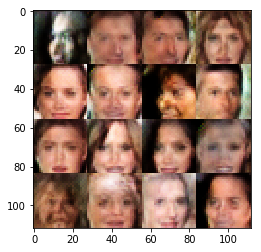

Epoch 1/2... Discriminator Loss: 1.1261 ... Generator Loss: 0.5274
Epoch 1/2... Discriminator Loss: 1.3477 ... Generator Loss: 0.4224
Epoch 1/2... Discriminator Loss: 0.9104 ... Generator Loss: 0.9077
Epoch 1/2... Discriminator Loss: 1.0885 ... Generator Loss: 0.6870
Epoch 1/2... Discriminator Loss: 1.0395 ... Generator Loss: 0.7602
Epoch 1/2... Discriminator Loss: 0.9411 ... Generator Loss: 0.7711
Epoch 1/2... Discriminator Loss: 0.7188 ... Generator Loss: 1.0292
Epoch 1/2... Discriminator Loss: 1.0629 ... Generator Loss: 0.6460
Epoch 1/2... Discriminator Loss: 1.0124 ... Generator Loss: 0.8427
Epoch 1/2... Discriminator Loss: 1.1419 ... Generator Loss: 0.5746


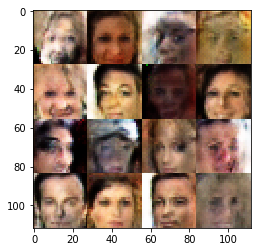

Epoch 1/2... Discriminator Loss: 1.1059 ... Generator Loss: 0.6651
Epoch 1/2... Discriminator Loss: 1.2130 ... Generator Loss: 0.4992
Epoch 1/2... Discriminator Loss: 1.0677 ... Generator Loss: 0.9271
Epoch 1/2... Discriminator Loss: 0.7618 ... Generator Loss: 1.3780
Epoch 1/2... Discriminator Loss: 1.0538 ... Generator Loss: 0.6103
Epoch 1/2... Discriminator Loss: 1.0212 ... Generator Loss: 0.7144
Epoch 1/2... Discriminator Loss: 0.8644 ... Generator Loss: 0.8882
Epoch 1/2... Discriminator Loss: 1.0409 ... Generator Loss: 0.7366
Epoch 1/2... Discriminator Loss: 1.3665 ... Generator Loss: 0.3882
Epoch 1/2... Discriminator Loss: 0.9973 ... Generator Loss: 0.8155


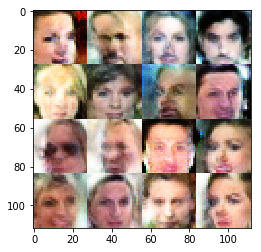

Epoch 1/2... Discriminator Loss: 1.0140 ... Generator Loss: 0.7292
Epoch 1/2... Discriminator Loss: 0.9752 ... Generator Loss: 0.7923
Epoch 1/2... Discriminator Loss: 1.4637 ... Generator Loss: 0.4260
Epoch 1/2... Discriminator Loss: 1.0835 ... Generator Loss: 0.6965
Epoch 1/2... Discriminator Loss: 1.4274 ... Generator Loss: 0.3664
Epoch 1/2... Discriminator Loss: 0.9421 ... Generator Loss: 0.8359
Epoch 1/2... Discriminator Loss: 0.9244 ... Generator Loss: 0.9994
Epoch 1/2... Discriminator Loss: 0.8292 ... Generator Loss: 0.8978
Epoch 1/2... Discriminator Loss: 1.1516 ... Generator Loss: 0.5637
Epoch 1/2... Discriminator Loss: 1.1481 ... Generator Loss: 0.8082


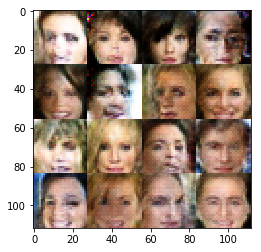

Epoch 1/2... Discriminator Loss: 1.0751 ... Generator Loss: 0.7198
Epoch 1/2... Discriminator Loss: 0.9598 ... Generator Loss: 0.7687
Epoch 1/2... Discriminator Loss: 0.7830 ... Generator Loss: 1.0447
Epoch 1/2... Discriminator Loss: 0.8816 ... Generator Loss: 0.8493
Epoch 1/2... Discriminator Loss: 0.7756 ... Generator Loss: 0.8516
Epoch 1/2... Discriminator Loss: 0.8953 ... Generator Loss: 1.2392
Epoch 1/2... Discriminator Loss: 0.9652 ... Generator Loss: 0.8208
Epoch 1/2... Discriminator Loss: 0.9980 ... Generator Loss: 0.7365
Epoch 1/2... Discriminator Loss: 1.1900 ... Generator Loss: 0.6055
Epoch 1/2... Discriminator Loss: 0.9145 ... Generator Loss: 0.8024


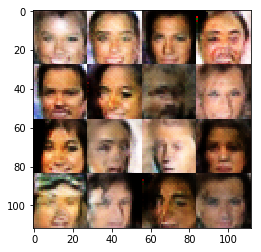

Epoch 1/2... Discriminator Loss: 0.9224 ... Generator Loss: 0.8231
Epoch 1/2... Discriminator Loss: 0.8840 ... Generator Loss: 0.9754
Epoch 1/2... Discriminator Loss: 0.8624 ... Generator Loss: 1.0884
Epoch 1/2... Discriminator Loss: 1.2117 ... Generator Loss: 0.4972
Epoch 1/2... Discriminator Loss: 1.1648 ... Generator Loss: 0.5453
Epoch 1/2... Discriminator Loss: 1.1762 ... Generator Loss: 0.6023
Epoch 1/2... Discriminator Loss: 0.9719 ... Generator Loss: 1.1336
Epoch 1/2... Discriminator Loss: 1.0645 ... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 1.0723 ... Generator Loss: 0.5949
Epoch 1/2... Discriminator Loss: 1.2227 ... Generator Loss: 0.5113


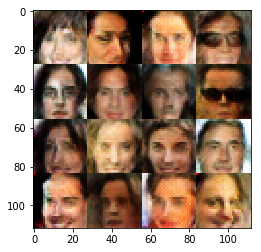

Epoch 1/2... Discriminator Loss: 2.2255 ... Generator Loss: 0.1817
Epoch 1/2... Discriminator Loss: 1.2964 ... Generator Loss: 1.3798
Epoch 1/2... Discriminator Loss: 1.2600 ... Generator Loss: 0.4461
Epoch 1/2... Discriminator Loss: 0.9578 ... Generator Loss: 0.7057
Epoch 1/2... Discriminator Loss: 1.2504 ... Generator Loss: 0.4881
Epoch 1/2... Discriminator Loss: 1.1544 ... Generator Loss: 0.7042
Epoch 1/2... Discriminator Loss: 0.9901 ... Generator Loss: 1.0960
Epoch 1/2... Discriminator Loss: 0.9600 ... Generator Loss: 1.6576
Epoch 1/2... Discriminator Loss: 1.1098 ... Generator Loss: 0.6548
Epoch 1/2... Discriminator Loss: 1.4114 ... Generator Loss: 0.3647


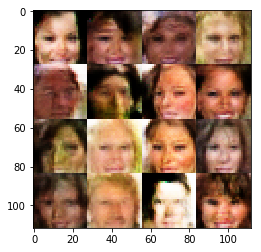

Epoch 1/2... Discriminator Loss: 1.0994 ... Generator Loss: 0.7631
Epoch 1/2... Discriminator Loss: 0.9294 ... Generator Loss: 0.9148
Epoch 1/2... Discriminator Loss: 1.1948 ... Generator Loss: 0.5444
Epoch 1/2... Discriminator Loss: 1.0859 ... Generator Loss: 0.6866
Epoch 1/2... Discriminator Loss: 0.9449 ... Generator Loss: 1.2093
Epoch 1/2... Discriminator Loss: 1.3098 ... Generator Loss: 0.4835
Epoch 1/2... Discriminator Loss: 0.9947 ... Generator Loss: 0.7180
Epoch 1/2... Discriminator Loss: 0.8356 ... Generator Loss: 0.8811
Epoch 1/2... Discriminator Loss: 1.2470 ... Generator Loss: 0.4713
Epoch 1/2... Discriminator Loss: 1.1584 ... Generator Loss: 0.6132


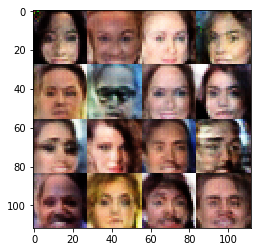

Epoch 1/2... Discriminator Loss: 1.6110 ... Generator Loss: 0.3029
Epoch 1/2... Discriminator Loss: 1.2215 ... Generator Loss: 0.5094
Epoch 1/2... Discriminator Loss: 1.2208 ... Generator Loss: 0.4714
Epoch 1/2... Discriminator Loss: 0.9458 ... Generator Loss: 1.4919
Epoch 1/2... Discriminator Loss: 1.0706 ... Generator Loss: 0.8094
Epoch 1/2... Discriminator Loss: 0.9993 ... Generator Loss: 0.7820
Epoch 1/2... Discriminator Loss: 1.0164 ... Generator Loss: 0.9266
Epoch 1/2... Discriminator Loss: 0.9996 ... Generator Loss: 0.6771
Epoch 1/2... Discriminator Loss: 0.9616 ... Generator Loss: 0.7034
Epoch 1/2... Discriminator Loss: 0.8044 ... Generator Loss: 1.1372


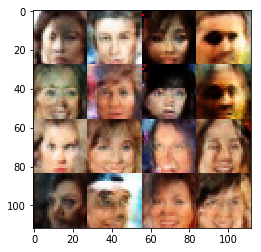

Epoch 1/2... Discriminator Loss: 1.0363 ... Generator Loss: 0.6206
Epoch 1/2... Discriminator Loss: 1.1753 ... Generator Loss: 0.5717
Epoch 1/2... Discriminator Loss: 1.0288 ... Generator Loss: 0.7290
Epoch 2/2... Discriminator Loss: 1.7026 ... Generator Loss: 0.2859
Epoch 2/2... Discriminator Loss: 0.9729 ... Generator Loss: 0.7918
Epoch 2/2... Discriminator Loss: 0.7933 ... Generator Loss: 1.0992
Epoch 2/2... Discriminator Loss: 0.9582 ... Generator Loss: 0.8580
Epoch 2/2... Discriminator Loss: 0.7371 ... Generator Loss: 0.9232
Epoch 2/2... Discriminator Loss: 0.9489 ... Generator Loss: 1.2064
Epoch 2/2... Discriminator Loss: 1.0162 ... Generator Loss: 0.7234


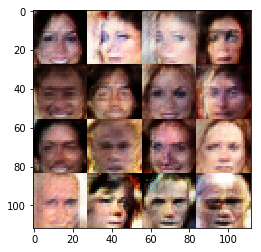

Epoch 2/2... Discriminator Loss: 0.9305 ... Generator Loss: 0.7169
Epoch 2/2... Discriminator Loss: 0.9330 ... Generator Loss: 0.6921
Epoch 2/2... Discriminator Loss: 1.1119 ... Generator Loss: 0.6286
Epoch 2/2... Discriminator Loss: 1.7988 ... Generator Loss: 0.9204
Epoch 2/2... Discriminator Loss: 1.1056 ... Generator Loss: 0.8002
Epoch 2/2... Discriminator Loss: 1.1249 ... Generator Loss: 0.7910
Epoch 2/2... Discriminator Loss: 1.2744 ... Generator Loss: 0.4523
Epoch 2/2... Discriminator Loss: 1.1659 ... Generator Loss: 0.7039
Epoch 2/2... Discriminator Loss: 1.0718 ... Generator Loss: 0.6860
Epoch 2/2... Discriminator Loss: 1.1221 ... Generator Loss: 1.2223


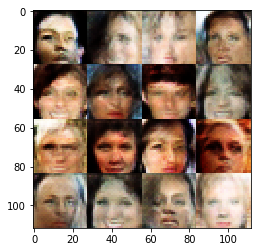

Epoch 2/2... Discriminator Loss: 1.0224 ... Generator Loss: 0.7535
Epoch 2/2... Discriminator Loss: 1.0336 ... Generator Loss: 0.6185
Epoch 2/2... Discriminator Loss: 1.0036 ... Generator Loss: 0.6987
Epoch 2/2... Discriminator Loss: 0.8442 ... Generator Loss: 1.2943
Epoch 2/2... Discriminator Loss: 0.8401 ... Generator Loss: 0.9816
Epoch 2/2... Discriminator Loss: 1.5785 ... Generator Loss: 0.3143
Epoch 2/2... Discriminator Loss: 1.0506 ... Generator Loss: 0.7169
Epoch 2/2... Discriminator Loss: 1.0762 ... Generator Loss: 0.6799
Epoch 2/2... Discriminator Loss: 0.9178 ... Generator Loss: 1.7367
Epoch 2/2... Discriminator Loss: 1.2053 ... Generator Loss: 0.5567


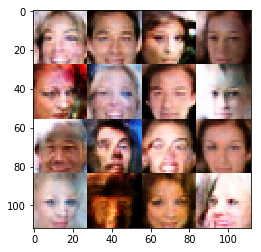

Epoch 2/2... Discriminator Loss: 1.1519 ... Generator Loss: 0.5515
Epoch 2/2... Discriminator Loss: 1.0572 ... Generator Loss: 0.8599
Epoch 2/2... Discriminator Loss: 1.3256 ... Generator Loss: 0.4232
Epoch 2/2... Discriminator Loss: 1.1067 ... Generator Loss: 0.5985
Epoch 2/2... Discriminator Loss: 1.3587 ... Generator Loss: 0.4273
Epoch 2/2... Discriminator Loss: 1.0045 ... Generator Loss: 0.7022
Epoch 2/2... Discriminator Loss: 1.1645 ... Generator Loss: 0.5814
Epoch 2/2... Discriminator Loss: 1.0155 ... Generator Loss: 0.8138
Epoch 2/2... Discriminator Loss: 1.4238 ... Generator Loss: 0.4747
Epoch 2/2... Discriminator Loss: 0.9108 ... Generator Loss: 0.7209


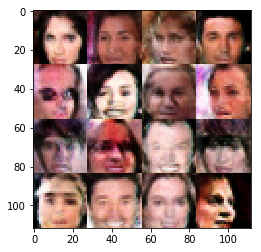

Epoch 2/2... Discriminator Loss: 0.8982 ... Generator Loss: 1.1736
Epoch 2/2... Discriminator Loss: 1.1660 ... Generator Loss: 0.5277
Epoch 2/2... Discriminator Loss: 1.1139 ... Generator Loss: 0.5475
Epoch 2/2... Discriminator Loss: 0.8598 ... Generator Loss: 0.9930
Epoch 2/2... Discriminator Loss: 1.2440 ... Generator Loss: 0.5298
Epoch 2/2... Discriminator Loss: 0.9979 ... Generator Loss: 0.8456
Epoch 2/2... Discriminator Loss: 0.9806 ... Generator Loss: 0.7901
Epoch 2/2... Discriminator Loss: 1.0678 ... Generator Loss: 0.7410
Epoch 2/2... Discriminator Loss: 1.1000 ... Generator Loss: 0.5969
Epoch 2/2... Discriminator Loss: 1.0280 ... Generator Loss: 0.7044


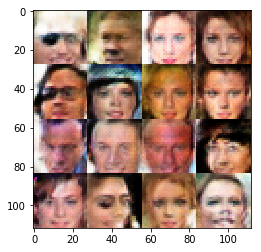

Epoch 2/2... Discriminator Loss: 1.3486 ... Generator Loss: 0.5058
Epoch 2/2... Discriminator Loss: 1.1388 ... Generator Loss: 0.7116
Epoch 2/2... Discriminator Loss: 1.0533 ... Generator Loss: 0.7125
Epoch 2/2... Discriminator Loss: 1.0873 ... Generator Loss: 0.6327
Epoch 2/2... Discriminator Loss: 1.4221 ... Generator Loss: 0.4183
Epoch 2/2... Discriminator Loss: 0.9803 ... Generator Loss: 1.1245
Epoch 2/2... Discriminator Loss: 1.1391 ... Generator Loss: 0.7243
Epoch 2/2... Discriminator Loss: 1.2088 ... Generator Loss: 0.5365
Epoch 2/2... Discriminator Loss: 1.1727 ... Generator Loss: 0.6468
Epoch 2/2... Discriminator Loss: 1.1829 ... Generator Loss: 0.6133


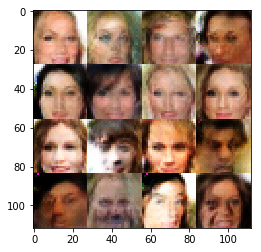

Epoch 2/2... Discriminator Loss: 1.3086 ... Generator Loss: 0.6072
Epoch 2/2... Discriminator Loss: 1.1292 ... Generator Loss: 0.5763
Epoch 2/2... Discriminator Loss: 1.1208 ... Generator Loss: 0.7323
Epoch 2/2... Discriminator Loss: 0.8730 ... Generator Loss: 1.1299
Epoch 2/2... Discriminator Loss: 0.8347 ... Generator Loss: 1.0877
Epoch 2/2... Discriminator Loss: 1.3604 ... Generator Loss: 0.4136
Epoch 2/2... Discriminator Loss: 1.0188 ... Generator Loss: 0.8280
Epoch 2/2... Discriminator Loss: 1.3067 ... Generator Loss: 0.5013
Epoch 2/2... Discriminator Loss: 0.9819 ... Generator Loss: 0.8047
Epoch 2/2... Discriminator Loss: 1.0980 ... Generator Loss: 0.7871


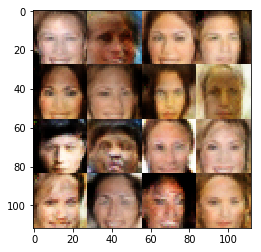

Epoch 2/2... Discriminator Loss: 0.9977 ... Generator Loss: 0.9658
Epoch 2/2... Discriminator Loss: 1.0189 ... Generator Loss: 1.2866
Epoch 2/2... Discriminator Loss: 1.0575 ... Generator Loss: 0.6768
Epoch 2/2... Discriminator Loss: 1.1364 ... Generator Loss: 0.6141
Epoch 2/2... Discriminator Loss: 1.0299 ... Generator Loss: 0.6721
Epoch 2/2... Discriminator Loss: 1.0515 ... Generator Loss: 0.8237
Epoch 2/2... Discriminator Loss: 1.3336 ... Generator Loss: 0.4618
Epoch 2/2... Discriminator Loss: 1.0393 ... Generator Loss: 0.9619
Epoch 2/2... Discriminator Loss: 1.2045 ... Generator Loss: 0.5341
Epoch 2/2... Discriminator Loss: 0.8595 ... Generator Loss: 0.8464


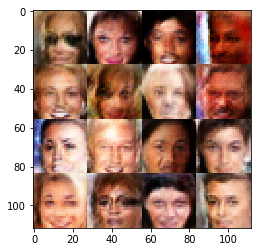

Epoch 2/2... Discriminator Loss: 1.1727 ... Generator Loss: 0.5315
Epoch 2/2... Discriminator Loss: 1.1945 ... Generator Loss: 0.5487
Epoch 2/2... Discriminator Loss: 1.0685 ... Generator Loss: 0.6504
Epoch 2/2... Discriminator Loss: 1.1332 ... Generator Loss: 0.5820
Epoch 2/2... Discriminator Loss: 0.9088 ... Generator Loss: 0.8386
Epoch 2/2... Discriminator Loss: 0.8747 ... Generator Loss: 0.9368
Epoch 2/2... Discriminator Loss: 0.9845 ... Generator Loss: 1.4128
Epoch 2/2... Discriminator Loss: 1.0528 ... Generator Loss: 0.7230
Epoch 2/2... Discriminator Loss: 1.3382 ... Generator Loss: 0.5301
Epoch 2/2... Discriminator Loss: 1.1507 ... Generator Loss: 0.6486


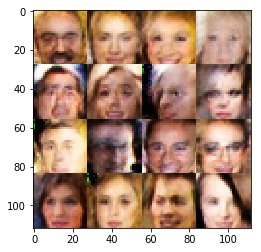

Epoch 2/2... Discriminator Loss: 1.2726 ... Generator Loss: 0.6009
Epoch 2/2... Discriminator Loss: 1.0000 ... Generator Loss: 0.6755
Epoch 2/2... Discriminator Loss: 1.2531 ... Generator Loss: 0.5332
Epoch 2/2... Discriminator Loss: 0.8307 ... Generator Loss: 1.1254
Epoch 2/2... Discriminator Loss: 0.9765 ... Generator Loss: 0.6994
Epoch 2/2... Discriminator Loss: 1.4326 ... Generator Loss: 0.3782
Epoch 2/2... Discriminator Loss: 1.1037 ... Generator Loss: 0.6473
Epoch 2/2... Discriminator Loss: 1.1667 ... Generator Loss: 0.5234
Epoch 2/2... Discriminator Loss: 1.1881 ... Generator Loss: 0.6889
Epoch 2/2... Discriminator Loss: 1.1092 ... Generator Loss: 0.5709


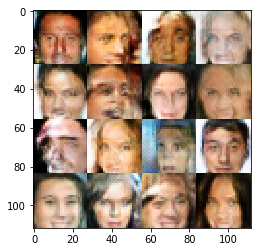

Epoch 2/2... Discriminator Loss: 1.0308 ... Generator Loss: 1.2319
Epoch 2/2... Discriminator Loss: 1.0159 ... Generator Loss: 0.9033
Epoch 2/2... Discriminator Loss: 1.0699 ... Generator Loss: 0.8466
Epoch 2/2... Discriminator Loss: 0.9928 ... Generator Loss: 0.8454
Epoch 2/2... Discriminator Loss: 1.3294 ... Generator Loss: 0.4834
Epoch 2/2... Discriminator Loss: 1.2566 ... Generator Loss: 0.6161
Epoch 2/2... Discriminator Loss: 1.0341 ... Generator Loss: 0.8474
Epoch 2/2... Discriminator Loss: 1.0005 ... Generator Loss: 0.7037
Epoch 2/2... Discriminator Loss: 1.0681 ... Generator Loss: 0.6414
Epoch 2/2... Discriminator Loss: 1.2547 ... Generator Loss: 0.6392


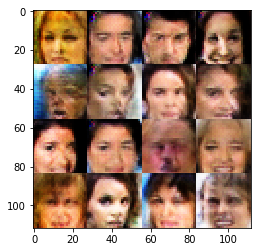

Epoch 2/2... Discriminator Loss: 1.3021 ... Generator Loss: 0.4527
Epoch 2/2... Discriminator Loss: 1.1298 ... Generator Loss: 0.7197
Epoch 2/2... Discriminator Loss: 1.3010 ... Generator Loss: 0.4400
Epoch 2/2... Discriminator Loss: 1.1214 ... Generator Loss: 0.6666
Epoch 2/2... Discriminator Loss: 0.9882 ... Generator Loss: 0.7223
Epoch 2/2... Discriminator Loss: 1.1558 ... Generator Loss: 0.6329
Epoch 2/2... Discriminator Loss: 1.1261 ... Generator Loss: 0.5528
Epoch 2/2... Discriminator Loss: 1.1105 ... Generator Loss: 0.8739
Epoch 2/2... Discriminator Loss: 0.9627 ... Generator Loss: 0.7341
Epoch 2/2... Discriminator Loss: 1.2524 ... Generator Loss: 0.4663


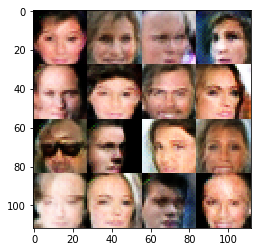

Epoch 2/2... Discriminator Loss: 1.0059 ... Generator Loss: 0.8437
Epoch 2/2... Discriminator Loss: 1.1789 ... Generator Loss: 0.5291
Epoch 2/2... Discriminator Loss: 0.9669 ... Generator Loss: 0.9185
Epoch 2/2... Discriminator Loss: 1.1141 ... Generator Loss: 0.7938
Epoch 2/2... Discriminator Loss: 0.7618 ... Generator Loss: 1.0809
Epoch 2/2... Discriminator Loss: 1.0970 ... Generator Loss: 0.6721
Epoch 2/2... Discriminator Loss: 0.9029 ... Generator Loss: 0.8572
Epoch 2/2... Discriminator Loss: 1.0686 ... Generator Loss: 0.9626
Epoch 2/2... Discriminator Loss: 1.0917 ... Generator Loss: 0.8186
Epoch 2/2... Discriminator Loss: 1.2999 ... Generator Loss: 0.5077


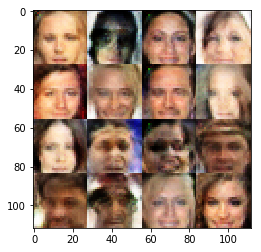

Epoch 2/2... Discriminator Loss: 1.0786 ... Generator Loss: 0.6978
Epoch 2/2... Discriminator Loss: 1.0281 ... Generator Loss: 0.8049
Epoch 2/2... Discriminator Loss: 0.8606 ... Generator Loss: 0.9150
Epoch 2/2... Discriminator Loss: 1.2691 ... Generator Loss: 0.4480
Epoch 2/2... Discriminator Loss: 1.1815 ... Generator Loss: 0.8211
Epoch 2/2... Discriminator Loss: 0.9620 ... Generator Loss: 0.7270
Epoch 2/2... Discriminator Loss: 1.4048 ... Generator Loss: 0.4224
Epoch 2/2... Discriminator Loss: 0.9702 ... Generator Loss: 1.2240
Epoch 2/2... Discriminator Loss: 1.3241 ... Generator Loss: 0.4057
Epoch 2/2... Discriminator Loss: 1.3696 ... Generator Loss: 0.3995


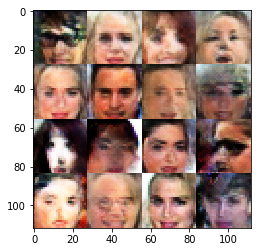

Epoch 2/2... Discriminator Loss: 1.3355 ... Generator Loss: 0.6236
Epoch 2/2... Discriminator Loss: 1.4042 ... Generator Loss: 0.4097
Epoch 2/2... Discriminator Loss: 0.9872 ... Generator Loss: 0.9557
Epoch 2/2... Discriminator Loss: 1.0378 ... Generator Loss: 0.8397
Epoch 2/2... Discriminator Loss: 1.0447 ... Generator Loss: 0.5677
Epoch 2/2... Discriminator Loss: 1.0167 ... Generator Loss: 0.6833
Epoch 2/2... Discriminator Loss: 0.9697 ... Generator Loss: 0.6563
Epoch 2/2... Discriminator Loss: 1.1405 ... Generator Loss: 0.8924
Epoch 2/2... Discriminator Loss: 0.9583 ... Generator Loss: 0.6918
Epoch 2/2... Discriminator Loss: 1.0190 ... Generator Loss: 0.6083


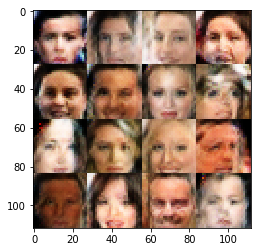

Epoch 2/2... Discriminator Loss: 0.9463 ... Generator Loss: 0.8393
Epoch 2/2... Discriminator Loss: 0.9548 ... Generator Loss: 0.9682
Epoch 2/2... Discriminator Loss: 0.9340 ... Generator Loss: 0.9077
Epoch 2/2... Discriminator Loss: 1.1773 ... Generator Loss: 0.6827
Epoch 2/2... Discriminator Loss: 1.2136 ... Generator Loss: 1.0067
Epoch 2/2... Discriminator Loss: 0.9142 ... Generator Loss: 0.8809
Epoch 2/2... Discriminator Loss: 1.4347 ... Generator Loss: 0.5975
Epoch 2/2... Discriminator Loss: 1.3514 ... Generator Loss: 0.4430
Epoch 2/2... Discriminator Loss: 1.4305 ... Generator Loss: 0.3566
Epoch 2/2... Discriminator Loss: 1.1892 ... Generator Loss: 0.6361


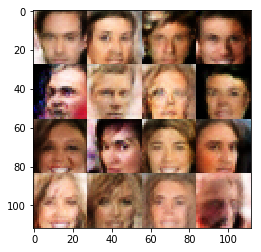

Epoch 2/2... Discriminator Loss: 1.3491 ... Generator Loss: 0.4096
Epoch 2/2... Discriminator Loss: 1.3290 ... Generator Loss: 0.4716
Epoch 2/2... Discriminator Loss: 0.9373 ... Generator Loss: 0.7233
Epoch 2/2... Discriminator Loss: 1.0652 ... Generator Loss: 0.9888
Epoch 2/2... Discriminator Loss: 1.1186 ... Generator Loss: 0.7200
Epoch 2/2... Discriminator Loss: 0.9629 ... Generator Loss: 0.9667
Epoch 2/2... Discriminator Loss: 0.9307 ... Generator Loss: 0.8926
Epoch 2/2... Discriminator Loss: 0.8804 ... Generator Loss: 0.8183
Epoch 2/2... Discriminator Loss: 1.0913 ... Generator Loss: 0.6526
Epoch 2/2... Discriminator Loss: 1.1617 ... Generator Loss: 1.2231


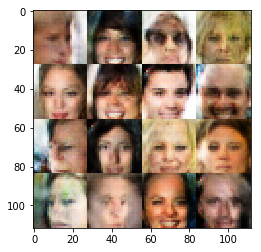

Epoch 2/2... Discriminator Loss: 1.1198 ... Generator Loss: 0.6258
Epoch 2/2... Discriminator Loss: 1.0997 ... Generator Loss: 0.6705
Epoch 2/2... Discriminator Loss: 1.0069 ... Generator Loss: 0.7898
Epoch 2/2... Discriminator Loss: 1.2226 ... Generator Loss: 0.5376
Epoch 2/2... Discriminator Loss: 1.3761 ... Generator Loss: 0.4345
Epoch 2/2... Discriminator Loss: 1.1390 ... Generator Loss: 0.5256
Epoch 2/2... Discriminator Loss: 0.9974 ... Generator Loss: 0.6643
Epoch 2/2... Discriminator Loss: 1.3721 ... Generator Loss: 0.4565
Epoch 2/2... Discriminator Loss: 1.2110 ... Generator Loss: 0.6157
Epoch 2/2... Discriminator Loss: 1.0915 ... Generator Loss: 0.7713


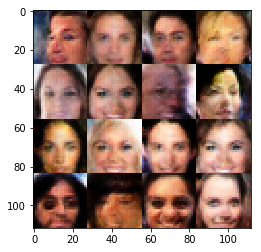

Epoch 2/2... Discriminator Loss: 1.0938 ... Generator Loss: 0.6716
Epoch 2/2... Discriminator Loss: 1.1046 ... Generator Loss: 0.5615
Epoch 2/2... Discriminator Loss: 1.0926 ... Generator Loss: 0.5638
Epoch 2/2... Discriminator Loss: 1.0080 ... Generator Loss: 0.8141
Epoch 2/2... Discriminator Loss: 0.9338 ... Generator Loss: 0.7618
Epoch 2/2... Discriminator Loss: 1.0761 ... Generator Loss: 0.7236
Epoch 2/2... Discriminator Loss: 1.2004 ... Generator Loss: 0.7799
Epoch 2/2... Discriminator Loss: 1.0076 ... Generator Loss: 0.8406
Epoch 2/2... Discriminator Loss: 1.0120 ... Generator Loss: 0.9042
Epoch 2/2... Discriminator Loss: 1.0575 ... Generator Loss: 1.6554


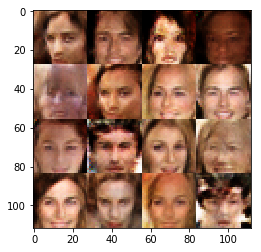

Epoch 2/2... Discriminator Loss: 0.9793 ... Generator Loss: 0.7708
Epoch 2/2... Discriminator Loss: 0.8618 ... Generator Loss: 1.2274
Epoch 2/2... Discriminator Loss: 0.9662 ... Generator Loss: 0.8749
Epoch 2/2... Discriminator Loss: 1.3316 ... Generator Loss: 0.4669
Epoch 2/2... Discriminator Loss: 0.9774 ... Generator Loss: 1.1614
Epoch 2/2... Discriminator Loss: 1.0347 ... Generator Loss: 0.8316
Epoch 2/2... Discriminator Loss: 1.1902 ... Generator Loss: 0.5450
Epoch 2/2... Discriminator Loss: 0.8855 ... Generator Loss: 1.1187
Epoch 2/2... Discriminator Loss: 1.1616 ... Generator Loss: 0.5965
Epoch 2/2... Discriminator Loss: 1.0637 ... Generator Loss: 0.5670


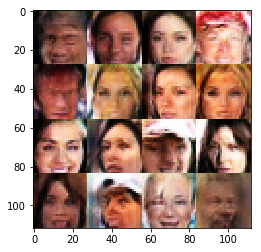

Epoch 2/2... Discriminator Loss: 0.8171 ... Generator Loss: 0.8994
Epoch 2/2... Discriminator Loss: 1.0809 ... Generator Loss: 0.7257
Epoch 2/2... Discriminator Loss: 1.0257 ... Generator Loss: 0.8198
Epoch 2/2... Discriminator Loss: 1.1213 ... Generator Loss: 0.5351
Epoch 2/2... Discriminator Loss: 1.0730 ... Generator Loss: 0.7115
Epoch 2/2... Discriminator Loss: 1.0324 ... Generator Loss: 0.7570
Epoch 2/2... Discriminator Loss: 1.3029 ... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 1.3901 ... Generator Loss: 0.5169
Epoch 2/2... Discriminator Loss: 1.4631 ... Generator Loss: 0.3757
Epoch 2/2... Discriminator Loss: 1.2270 ... Generator Loss: 0.6377


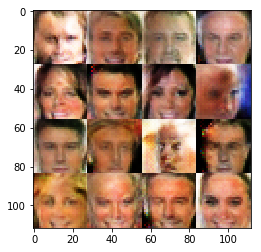

Epoch 2/2... Discriminator Loss: 1.2567 ... Generator Loss: 0.4629
Epoch 2/2... Discriminator Loss: 1.0750 ... Generator Loss: 0.8442
Epoch 2/2... Discriminator Loss: 0.7503 ... Generator Loss: 1.0850
Epoch 2/2... Discriminator Loss: 1.1614 ... Generator Loss: 0.6288
Epoch 2/2... Discriminator Loss: 1.0924 ... Generator Loss: 0.6964
Epoch 2/2... Discriminator Loss: 1.0325 ... Generator Loss: 0.6534
Epoch 2/2... Discriminator Loss: 0.7970 ... Generator Loss: 0.9698
Epoch 2/2... Discriminator Loss: 1.1056 ... Generator Loss: 0.6266
Epoch 2/2... Discriminator Loss: 1.0390 ... Generator Loss: 0.7173
Epoch 2/2... Discriminator Loss: 1.2352 ... Generator Loss: 0.5087


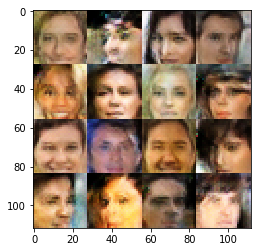

Epoch 2/2... Discriminator Loss: 1.2729 ... Generator Loss: 0.5895
Epoch 2/2... Discriminator Loss: 1.2793 ... Generator Loss: 0.4702
Epoch 2/2... Discriminator Loss: 0.9692 ... Generator Loss: 1.5753
Epoch 2/2... Discriminator Loss: 1.0157 ... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 1.3771 ... Generator Loss: 0.4520
Epoch 2/2... Discriminator Loss: 0.9099 ... Generator Loss: 0.9102
Epoch 2/2... Discriminator Loss: 1.3907 ... Generator Loss: 0.4477
Epoch 2/2... Discriminator Loss: 1.0120 ... Generator Loss: 0.8742
Epoch 2/2... Discriminator Loss: 0.9929 ... Generator Loss: 0.6784
Epoch 2/2... Discriminator Loss: 1.0251 ... Generator Loss: 0.8415


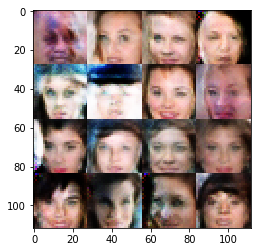

Epoch 2/2... Discriminator Loss: 0.8589 ... Generator Loss: 1.0887
Epoch 2/2... Discriminator Loss: 1.0601 ... Generator Loss: 0.6642
Epoch 2/2... Discriminator Loss: 0.9204 ... Generator Loss: 0.9639
Epoch 2/2... Discriminator Loss: 1.1352 ... Generator Loss: 0.5698
Epoch 2/2... Discriminator Loss: 0.8399 ... Generator Loss: 0.9130
Epoch 2/2... Discriminator Loss: 0.9995 ... Generator Loss: 0.7531
Epoch 2/2... Discriminator Loss: 1.1278 ... Generator Loss: 0.5652
Epoch 2/2... Discriminator Loss: 0.7907 ... Generator Loss: 1.0663
Epoch 2/2... Discriminator Loss: 1.1355 ... Generator Loss: 0.6140
Epoch 2/2... Discriminator Loss: 1.2769 ... Generator Loss: 0.5600


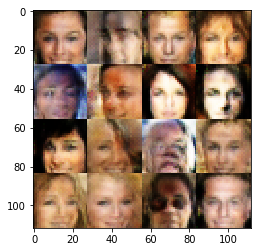

Epoch 2/2... Discriminator Loss: 0.9924 ... Generator Loss: 1.0176
Epoch 2/2... Discriminator Loss: 1.0782 ... Generator Loss: 0.7640
Epoch 2/2... Discriminator Loss: 1.0575 ... Generator Loss: 0.7508
Epoch 2/2... Discriminator Loss: 0.9611 ... Generator Loss: 1.1553
Epoch 2/2... Discriminator Loss: 1.0363 ... Generator Loss: 0.6734
Epoch 2/2... Discriminator Loss: 0.9368 ... Generator Loss: 0.9112
Epoch 2/2... Discriminator Loss: 1.2922 ... Generator Loss: 0.4177
Epoch 2/2... Discriminator Loss: 0.9062 ... Generator Loss: 0.8997
Epoch 2/2... Discriminator Loss: 1.1464 ... Generator Loss: 0.6224
Epoch 2/2... Discriminator Loss: 1.0462 ... Generator Loss: 0.7060


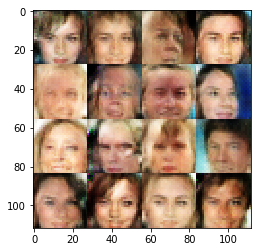

Epoch 2/2... Discriminator Loss: 1.3385 ... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 1.1714 ... Generator Loss: 0.5427
Epoch 2/2... Discriminator Loss: 1.0926 ... Generator Loss: 0.8800
Epoch 2/2... Discriminator Loss: 1.4402 ... Generator Loss: 0.4534
Epoch 2/2... Discriminator Loss: 1.4349 ... Generator Loss: 0.4268
Epoch 2/2... Discriminator Loss: 1.0989 ... Generator Loss: 1.0473
Epoch 2/2... Discriminator Loss: 1.0375 ... Generator Loss: 0.7007
Epoch 2/2... Discriminator Loss: 1.2409 ... Generator Loss: 0.5145
Epoch 2/2... Discriminator Loss: 1.1191 ... Generator Loss: 0.5730
Epoch 2/2... Discriminator Loss: 1.0606 ... Generator Loss: 0.7600


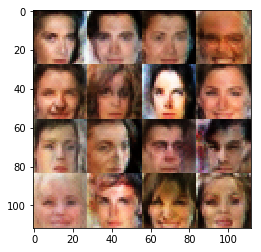

Epoch 2/2... Discriminator Loss: 0.8862 ... Generator Loss: 0.8980
Epoch 2/2... Discriminator Loss: 0.9995 ... Generator Loss: 0.6129
Epoch 2/2... Discriminator Loss: 0.8062 ... Generator Loss: 0.9924
Epoch 2/2... Discriminator Loss: 0.9229 ... Generator Loss: 0.7705
Epoch 2/2... Discriminator Loss: 1.1569 ... Generator Loss: 0.5866
Epoch 2/2... Discriminator Loss: 1.1110 ... Generator Loss: 0.6780
Epoch 2/2... Discriminator Loss: 1.0913 ... Generator Loss: 0.7412
Epoch 2/2... Discriminator Loss: 1.0065 ... Generator Loss: 1.0334
Epoch 2/2... Discriminator Loss: 1.0323 ... Generator Loss: 0.7338
Epoch 2/2... Discriminator Loss: 1.2572 ... Generator Loss: 0.5121


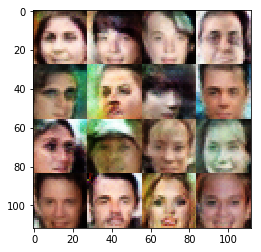

Epoch 2/2... Discriminator Loss: 1.1840 ... Generator Loss: 0.6589
Epoch 2/2... Discriminator Loss: 1.0736 ... Generator Loss: 0.8271
Epoch 2/2... Discriminator Loss: 1.1508 ... Generator Loss: 0.5515
Epoch 2/2... Discriminator Loss: 0.8813 ... Generator Loss: 0.9397
Epoch 2/2... Discriminator Loss: 0.8282 ... Generator Loss: 1.1124
Epoch 2/2... Discriminator Loss: 0.9769 ... Generator Loss: 0.9814
Epoch 2/2... Discriminator Loss: 1.0881 ... Generator Loss: 0.7287
Epoch 2/2... Discriminator Loss: 0.8743 ... Generator Loss: 0.9999
Epoch 2/2... Discriminator Loss: 1.5381 ... Generator Loss: 0.3949
Epoch 2/2... Discriminator Loss: 0.9077 ... Generator Loss: 0.8945


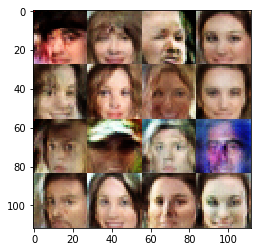

Epoch 2/2... Discriminator Loss: 0.8917 ... Generator Loss: 0.9985
Epoch 2/2... Discriminator Loss: 1.0801 ... Generator Loss: 1.0249
Epoch 2/2... Discriminator Loss: 1.1723 ... Generator Loss: 0.5785
Epoch 2/2... Discriminator Loss: 1.4543 ... Generator Loss: 0.3477
Epoch 2/2... Discriminator Loss: 1.4764 ... Generator Loss: 0.3612
Epoch 2/2... Discriminator Loss: 1.2656 ... Generator Loss: 0.5743
Epoch 2/2... Discriminator Loss: 1.4338 ... Generator Loss: 0.3898
Epoch 2/2... Discriminator Loss: 1.0041 ... Generator Loss: 0.6668
Epoch 2/2... Discriminator Loss: 1.0262 ... Generator Loss: 0.6654
Epoch 2/2... Discriminator Loss: 1.1879 ... Generator Loss: 0.7177


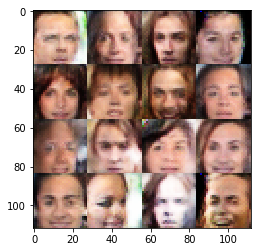

Epoch 2/2... Discriminator Loss: 1.0813 ... Generator Loss: 0.5909
Epoch 2/2... Discriminator Loss: 1.0611 ... Generator Loss: 0.6647
Epoch 2/2... Discriminator Loss: 1.0122 ... Generator Loss: 0.6711
Epoch 2/2... Discriminator Loss: 1.1504 ... Generator Loss: 0.6063
Epoch 2/2... Discriminator Loss: 0.9958 ... Generator Loss: 0.8437
Epoch 2/2... Discriminator Loss: 0.9747 ... Generator Loss: 0.8208
Epoch 2/2... Discriminator Loss: 1.0522 ... Generator Loss: 0.8721
Epoch 2/2... Discriminator Loss: 0.9646 ... Generator Loss: 0.7847
Epoch 2/2... Discriminator Loss: 1.1418 ... Generator Loss: 0.6953
Epoch 2/2... Discriminator Loss: 1.2873 ... Generator Loss: 0.4570


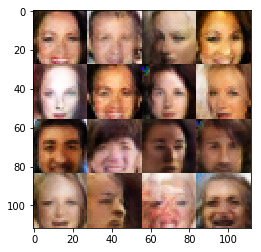

Epoch 2/2... Discriminator Loss: 0.9326 ... Generator Loss: 0.8104
Epoch 2/2... Discriminator Loss: 1.0460 ... Generator Loss: 0.7478
Epoch 2/2... Discriminator Loss: 1.3115 ... Generator Loss: 0.4473
Epoch 2/2... Discriminator Loss: 1.1877 ... Generator Loss: 1.0949
Epoch 2/2... Discriminator Loss: 0.8953 ... Generator Loss: 0.9666
Epoch 2/2... Discriminator Loss: 0.8468 ... Generator Loss: 0.8872
Epoch 2/2... Discriminator Loss: 0.9813 ... Generator Loss: 0.8258
Epoch 2/2... Discriminator Loss: 1.1955 ... Generator Loss: 0.5124
Epoch 2/2... Discriminator Loss: 1.2652 ... Generator Loss: 0.5070
Epoch 2/2... Discriminator Loss: 1.0632 ... Generator Loss: 0.7042


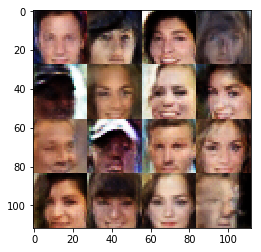

Epoch 2/2... Discriminator Loss: 1.0279 ... Generator Loss: 0.6688
Epoch 2/2... Discriminator Loss: 0.9495 ... Generator Loss: 0.6107
Epoch 2/2... Discriminator Loss: 1.0813 ... Generator Loss: 0.6090
Epoch 2/2... Discriminator Loss: 1.3459 ... Generator Loss: 0.6284
Epoch 2/2... Discriminator Loss: 0.9962 ... Generator Loss: 0.7469
Epoch 2/2... Discriminator Loss: 1.0389 ... Generator Loss: 0.8312
Epoch 2/2... Discriminator Loss: 1.2687 ... Generator Loss: 0.4392
Epoch 2/2... Discriminator Loss: 1.0005 ... Generator Loss: 0.6196
Epoch 2/2... Discriminator Loss: 1.2968 ... Generator Loss: 0.4501
Epoch 2/2... Discriminator Loss: 1.0669 ... Generator Loss: 0.8408


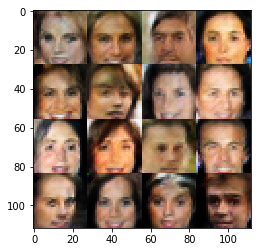

Epoch 2/2... Discriminator Loss: 1.0443 ... Generator Loss: 0.8920
Epoch 2/2... Discriminator Loss: 1.1345 ... Generator Loss: 0.5469
Epoch 2/2... Discriminator Loss: 1.0352 ... Generator Loss: 0.8261
Epoch 2/2... Discriminator Loss: 1.1747 ... Generator Loss: 0.6351
Epoch 2/2... Discriminator Loss: 1.2969 ... Generator Loss: 0.4502
Epoch 2/2... Discriminator Loss: 0.7859 ... Generator Loss: 0.9872
Epoch 2/2... Discriminator Loss: 1.0250 ... Generator Loss: 0.7966
Epoch 2/2... Discriminator Loss: 1.0471 ... Generator Loss: 0.7511
Epoch 2/2... Discriminator Loss: 1.2421 ... Generator Loss: 0.7421
Epoch 2/2... Discriminator Loss: 1.1562 ... Generator Loss: 0.6218


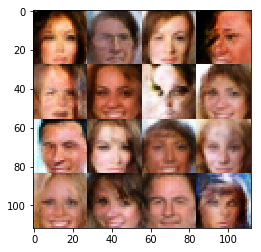

Epoch 2/2... Discriminator Loss: 1.2736 ... Generator Loss: 0.4214
Epoch 2/2... Discriminator Loss: 1.1724 ... Generator Loss: 0.5170
Epoch 2/2... Discriminator Loss: 0.9657 ... Generator Loss: 0.6889
Epoch 2/2... Discriminator Loss: 1.1991 ... Generator Loss: 0.6377
Epoch 2/2... Discriminator Loss: 1.2147 ... Generator Loss: 0.5116
Epoch 2/2... Discriminator Loss: 1.2187 ... Generator Loss: 0.8137
Epoch 2/2... Discriminator Loss: 1.0163 ... Generator Loss: 0.8636
Epoch 2/2... Discriminator Loss: 1.0772 ... Generator Loss: 0.7359
Epoch 2/2... Discriminator Loss: 0.9512 ... Generator Loss: 0.8111
Epoch 2/2... Discriminator Loss: 1.0847 ... Generator Loss: 0.8428


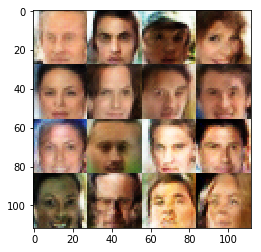

Epoch 2/2... Discriminator Loss: 1.0394 ... Generator Loss: 0.6487
Epoch 2/2... Discriminator Loss: 1.1131 ... Generator Loss: 0.5577
Epoch 2/2... Discriminator Loss: 1.2344 ... Generator Loss: 0.6281
Epoch 2/2... Discriminator Loss: 1.0187 ... Generator Loss: 0.8851
Epoch 2/2... Discriminator Loss: 1.0324 ... Generator Loss: 0.9094
Epoch 2/2... Discriminator Loss: 1.1693 ... Generator Loss: 0.5839
Epoch 2/2... Discriminator Loss: 1.2554 ... Generator Loss: 0.4747
Epoch 2/2... Discriminator Loss: 1.1460 ... Generator Loss: 0.5005
Epoch 2/2... Discriminator Loss: 1.0145 ... Generator Loss: 0.9289
Epoch 2/2... Discriminator Loss: 1.2922 ... Generator Loss: 0.4849


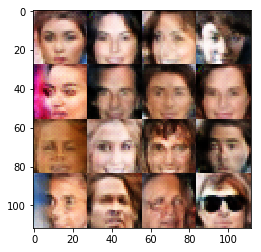

Epoch 2/2... Discriminator Loss: 0.9927 ... Generator Loss: 0.7518
Epoch 2/2... Discriminator Loss: 1.2236 ... Generator Loss: 0.5725
Epoch 2/2... Discriminator Loss: 0.9657 ... Generator Loss: 0.8740
Epoch 2/2... Discriminator Loss: 1.1216 ... Generator Loss: 0.5418
Epoch 2/2... Discriminator Loss: 1.0786 ... Generator Loss: 0.7647
Epoch 2/2... Discriminator Loss: 1.3023 ... Generator Loss: 0.5727
Epoch 2/2... Discriminator Loss: 1.1360 ... Generator Loss: 0.6327
Epoch 2/2... Discriminator Loss: 1.0848 ... Generator Loss: 0.8370
Epoch 2/2... Discriminator Loss: 0.8082 ... Generator Loss: 1.0539
Epoch 2/2... Discriminator Loss: 1.3353 ... Generator Loss: 0.4652


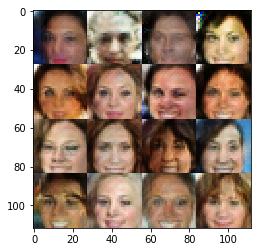

Epoch 2/2... Discriminator Loss: 1.2219 ... Generator Loss: 0.5731
Epoch 2/2... Discriminator Loss: 1.3165 ... Generator Loss: 0.5179
Epoch 2/2... Discriminator Loss: 1.1472 ... Generator Loss: 0.5808
Epoch 2/2... Discriminator Loss: 1.0505 ... Generator Loss: 0.9508
Epoch 2/2... Discriminator Loss: 1.1289 ... Generator Loss: 0.6272
Epoch 2/2... Discriminator Loss: 0.9827 ... Generator Loss: 0.7309
Epoch 2/2... Discriminator Loss: 1.2908 ... Generator Loss: 0.5465
Epoch 2/2... Discriminator Loss: 1.5526 ... Generator Loss: 0.3385
Epoch 2/2... Discriminator Loss: 1.2272 ... Generator Loss: 0.4586
Epoch 2/2... Discriminator Loss: 0.9840 ... Generator Loss: 0.7622


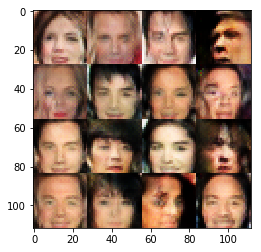

Epoch 2/2... Discriminator Loss: 1.2958 ... Generator Loss: 0.4759
Epoch 2/2... Discriminator Loss: 1.1077 ... Generator Loss: 0.8683
Epoch 2/2... Discriminator Loss: 1.6826 ... Generator Loss: 0.3682
Epoch 2/2... Discriminator Loss: 1.1693 ... Generator Loss: 0.5735
Epoch 2/2... Discriminator Loss: 0.9615 ... Generator Loss: 0.7893
Epoch 2/2... Discriminator Loss: 1.3039 ... Generator Loss: 0.4877
Epoch 2/2... Discriminator Loss: 1.4314 ... Generator Loss: 0.3446
Epoch 2/2... Discriminator Loss: 1.1515 ... Generator Loss: 0.6555
Epoch 2/2... Discriminator Loss: 1.3362 ... Generator Loss: 0.4660
Epoch 2/2... Discriminator Loss: 1.0756 ... Generator Loss: 0.6474


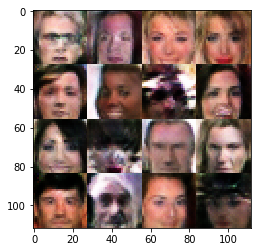

Epoch 2/2... Discriminator Loss: 1.0219 ... Generator Loss: 0.7029
Epoch 2/2... Discriminator Loss: 1.0063 ... Generator Loss: 0.6958
Epoch 2/2... Discriminator Loss: 1.0354 ... Generator Loss: 0.7707
Epoch 2/2... Discriminator Loss: 1.1838 ... Generator Loss: 0.5419
Epoch 2/2... Discriminator Loss: 1.2753 ... Generator Loss: 0.4794
Epoch 2/2... Discriminator Loss: 1.2128 ... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 1.3980 ... Generator Loss: 0.4099
Epoch 2/2... Discriminator Loss: 1.0271 ... Generator Loss: 0.7650
Epoch 2/2... Discriminator Loss: 1.2155 ... Generator Loss: 0.5466
Epoch 2/2... Discriminator Loss: 0.9831 ... Generator Loss: 0.9522


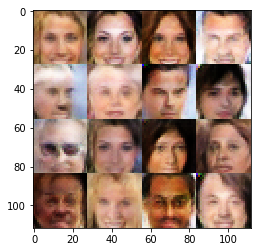

Epoch 2/2... Discriminator Loss: 0.9498 ... Generator Loss: 1.1192
Epoch 2/2... Discriminator Loss: 1.0333 ... Generator Loss: 0.9343
Epoch 2/2... Discriminator Loss: 1.1376 ... Generator Loss: 0.6472
Epoch 2/2... Discriminator Loss: 1.1149 ... Generator Loss: 0.6968
Epoch 2/2... Discriminator Loss: 1.3105 ... Generator Loss: 0.4813
Epoch 2/2... Discriminator Loss: 1.1376 ... Generator Loss: 0.5355
Epoch 2/2... Discriminator Loss: 1.3626 ... Generator Loss: 0.4254
Epoch 2/2... Discriminator Loss: 1.0767 ... Generator Loss: 0.7510
Epoch 2/2... Discriminator Loss: 1.3330 ... Generator Loss: 0.4263
Epoch 2/2... Discriminator Loss: 1.1002 ... Generator Loss: 0.5560


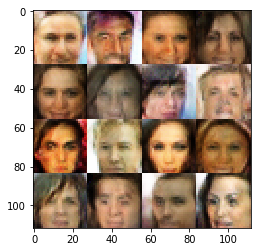

Epoch 2/2... Discriminator Loss: 1.3976 ... Generator Loss: 0.8060
Epoch 2/2... Discriminator Loss: 1.2781 ... Generator Loss: 0.4699
Epoch 2/2... Discriminator Loss: 0.9512 ... Generator Loss: 0.7043
Epoch 2/2... Discriminator Loss: 1.1326 ... Generator Loss: 0.7267
Epoch 2/2... Discriminator Loss: 0.8426 ... Generator Loss: 0.9983
Epoch 2/2... Discriminator Loss: 1.1718 ... Generator Loss: 0.8171
Epoch 2/2... Discriminator Loss: 1.1675 ... Generator Loss: 0.5402
Epoch 2/2... Discriminator Loss: 1.0399 ... Generator Loss: 0.7350
Epoch 2/2... Discriminator Loss: 1.0749 ... Generator Loss: 1.1607
Epoch 2/2... Discriminator Loss: 1.1600 ... Generator Loss: 0.5315


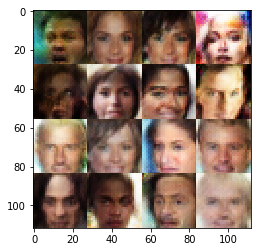

Epoch 2/2... Discriminator Loss: 1.3740 ... Generator Loss: 0.5092
Epoch 2/2... Discriminator Loss: 1.0830 ... Generator Loss: 0.6297
Epoch 2/2... Discriminator Loss: 0.8700 ... Generator Loss: 1.2644
Epoch 2/2... Discriminator Loss: 1.1664 ... Generator Loss: 0.5164
Epoch 2/2... Discriminator Loss: 1.1262 ... Generator Loss: 0.6295
Epoch 2/2... Discriminator Loss: 1.0693 ... Generator Loss: 0.8582
Epoch 2/2... Discriminator Loss: 1.1770 ... Generator Loss: 1.0072
Epoch 2/2... Discriminator Loss: 0.9209 ... Generator Loss: 0.8158
Epoch 2/2... Discriminator Loss: 1.2610 ... Generator Loss: 0.5107
Epoch 2/2... Discriminator Loss: 1.2341 ... Generator Loss: 0.5363


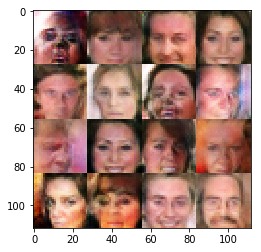

Epoch 2/2... Discriminator Loss: 1.4566 ... Generator Loss: 0.5692
Epoch 2/2... Discriminator Loss: 1.3206 ... Generator Loss: 0.4344
Epoch 2/2... Discriminator Loss: 1.1724 ... Generator Loss: 0.5814
Epoch 2/2... Discriminator Loss: 1.6353 ... Generator Loss: 0.2863
Epoch 2/2... Discriminator Loss: 0.9611 ... Generator Loss: 0.9357
Epoch 2/2... Discriminator Loss: 1.1006 ... Generator Loss: 0.7012
Epoch 2/2... Discriminator Loss: 1.0799 ... Generator Loss: 0.8433
Epoch 2/2... Discriminator Loss: 0.9878 ... Generator Loss: 0.7702
Epoch 2/2... Discriminator Loss: 1.6858 ... Generator Loss: 0.3058
Epoch 2/2... Discriminator Loss: 1.0255 ... Generator Loss: 0.9529


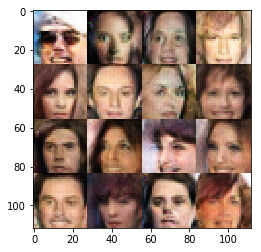

Epoch 2/2... Discriminator Loss: 1.2837 ... Generator Loss: 0.8955
Epoch 2/2... Discriminator Loss: 0.8415 ... Generator Loss: 0.9828
Epoch 2/2... Discriminator Loss: 0.9377 ... Generator Loss: 0.7744
Epoch 2/2... Discriminator Loss: 0.9016 ... Generator Loss: 0.9458
Epoch 2/2... Discriminator Loss: 1.1412 ... Generator Loss: 0.5405
Epoch 2/2... Discriminator Loss: 1.0132 ... Generator Loss: 0.7814
Epoch 2/2... Discriminator Loss: 1.2132 ... Generator Loss: 0.5506
Epoch 2/2... Discriminator Loss: 1.0246 ... Generator Loss: 0.8940
Epoch 2/2... Discriminator Loss: 1.2014 ... Generator Loss: 0.7148
Epoch 2/2... Discriminator Loss: 1.0278 ... Generator Loss: 0.7146


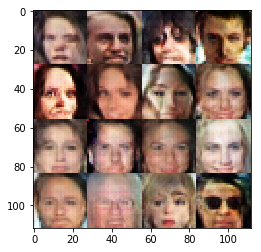

Epoch 2/2... Discriminator Loss: 1.0066 ... Generator Loss: 0.7854
Epoch 2/2... Discriminator Loss: 1.2260 ... Generator Loss: 0.5140
Epoch 2/2... Discriminator Loss: 0.7745 ... Generator Loss: 1.6273
Epoch 2/2... Discriminator Loss: 1.4839 ... Generator Loss: 0.3808
Epoch 2/2... Discriminator Loss: 1.1106 ... Generator Loss: 0.6352
Epoch 2/2... Discriminator Loss: 0.9813 ... Generator Loss: 0.7075
Epoch 2/2... Discriminator Loss: 0.9376 ... Generator Loss: 0.7090
Epoch 2/2... Discriminator Loss: 1.1573 ... Generator Loss: 0.5615
Epoch 2/2... Discriminator Loss: 1.0633 ... Generator Loss: 0.6250
Epoch 2/2... Discriminator Loss: 1.2114 ... Generator Loss: 0.5034


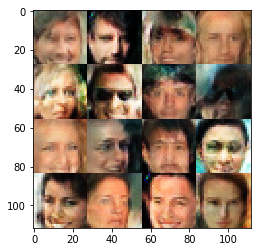

Epoch 2/2... Discriminator Loss: 0.9970 ... Generator Loss: 0.9590
Epoch 2/2... Discriminator Loss: 1.2563 ... Generator Loss: 0.5188
Epoch 2/2... Discriminator Loss: 1.3376 ... Generator Loss: 0.4882
Epoch 2/2... Discriminator Loss: 1.1719 ... Generator Loss: 0.5763
Epoch 2/2... Discriminator Loss: 0.7753 ... Generator Loss: 0.9555
Epoch 2/2... Discriminator Loss: 0.9843 ... Generator Loss: 0.7484
Epoch 2/2... Discriminator Loss: 1.2191 ... Generator Loss: 0.5204
Epoch 2/2... Discriminator Loss: 1.0359 ... Generator Loss: 0.6543
Epoch 2/2... Discriminator Loss: 1.1614 ... Generator Loss: 0.5761
Epoch 2/2... Discriminator Loss: 0.9034 ... Generator Loss: 1.0430


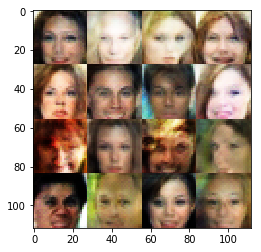

Epoch 2/2... Discriminator Loss: 1.0900 ... Generator Loss: 0.7799
Epoch 2/2... Discriminator Loss: 1.2956 ... Generator Loss: 0.4830
Epoch 2/2... Discriminator Loss: 1.0772 ... Generator Loss: 0.7529
Epoch 2/2... Discriminator Loss: 1.0497 ... Generator Loss: 0.8207
Epoch 2/2... Discriminator Loss: 1.0256 ... Generator Loss: 0.8031
Epoch 2/2... Discriminator Loss: 1.0558 ... Generator Loss: 1.0258
Epoch 2/2... Discriminator Loss: 1.1021 ... Generator Loss: 0.8994
Epoch 2/2... Discriminator Loss: 1.1554 ... Generator Loss: 0.5933
Epoch 2/2... Discriminator Loss: 0.8832 ... Generator Loss: 0.7778
Epoch 2/2... Discriminator Loss: 1.1997 ... Generator Loss: 0.5231


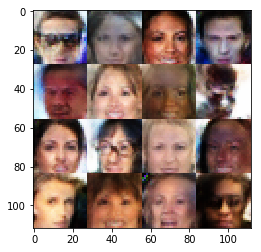

Epoch 2/2... Discriminator Loss: 1.4462 ... Generator Loss: 0.3749
Epoch 2/2... Discriminator Loss: 0.8756 ... Generator Loss: 0.9198
Epoch 2/2... Discriminator Loss: 1.0564 ... Generator Loss: 0.7264
Epoch 2/2... Discriminator Loss: 1.0194 ... Generator Loss: 0.7208
Epoch 2/2... Discriminator Loss: 1.3618 ... Generator Loss: 0.4309
Epoch 2/2... Discriminator Loss: 1.3068 ... Generator Loss: 0.4024
Epoch 2/2... Discriminator Loss: 1.1320 ... Generator Loss: 0.6573
Epoch 2/2... Discriminator Loss: 1.0258 ... Generator Loss: 0.7029
Epoch 2/2... Discriminator Loss: 0.9169 ... Generator Loss: 0.7639
Epoch 2/2... Discriminator Loss: 1.0972 ... Generator Loss: 0.7132


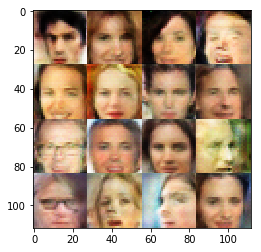

Epoch 2/2... Discriminator Loss: 1.5117 ... Generator Loss: 0.3317
Epoch 2/2... Discriminator Loss: 0.9201 ... Generator Loss: 0.8283
Epoch 2/2... Discriminator Loss: 1.2582 ... Generator Loss: 0.5175
Epoch 2/2... Discriminator Loss: 1.4242 ... Generator Loss: 0.4532
Epoch 2/2... Discriminator Loss: 1.0559 ... Generator Loss: 0.7767
Epoch 2/2... Discriminator Loss: 0.8145 ... Generator Loss: 0.8721
Epoch 2/2... Discriminator Loss: 1.3548 ... Generator Loss: 0.5152
Epoch 2/2... Discriminator Loss: 0.9882 ... Generator Loss: 0.6985
Epoch 2/2... Discriminator Loss: 1.0274 ... Generator Loss: 0.7415
Epoch 2/2... Discriminator Loss: 1.1213 ... Generator Loss: 0.5746


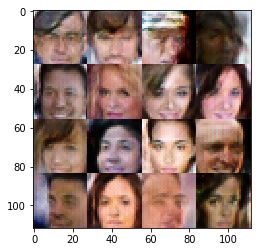

Epoch 2/2... Discriminator Loss: 0.8957 ... Generator Loss: 1.0832
Epoch 2/2... Discriminator Loss: 0.8297 ... Generator Loss: 1.0852
Epoch 2/2... Discriminator Loss: 0.9715 ... Generator Loss: 0.8342
Epoch 2/2... Discriminator Loss: 0.8895 ... Generator Loss: 1.2304
Epoch 2/2... Discriminator Loss: 1.0782 ... Generator Loss: 0.6280
Epoch 2/2... Discriminator Loss: 0.9328 ... Generator Loss: 0.9006
Epoch 2/2... Discriminator Loss: 1.3510 ... Generator Loss: 0.3844
Epoch 2/2... Discriminator Loss: 1.1830 ... Generator Loss: 0.5737
Epoch 2/2... Discriminator Loss: 0.9901 ... Generator Loss: 0.6303
Epoch 2/2... Discriminator Loss: 0.8999 ... Generator Loss: 1.0537


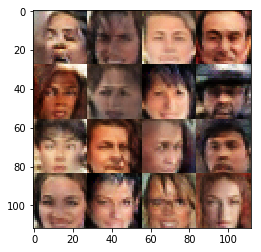

Epoch 2/2... Discriminator Loss: 1.2589 ... Generator Loss: 0.4933
Epoch 2/2... Discriminator Loss: 1.2818 ... Generator Loss: 0.4587
Epoch 2/2... Discriminator Loss: 1.4026 ... Generator Loss: 0.4113
Epoch 2/2... Discriminator Loss: 1.1221 ... Generator Loss: 0.5884
Epoch 2/2... Discriminator Loss: 0.8876 ... Generator Loss: 0.8700
Epoch 2/2... Discriminator Loss: 1.0241 ... Generator Loss: 0.6760
Epoch 2/2... Discriminator Loss: 1.1534 ... Generator Loss: 0.5476
Epoch 2/2... Discriminator Loss: 1.2301 ... Generator Loss: 0.5536
Epoch 2/2... Discriminator Loss: 1.1408 ... Generator Loss: 0.7541
Epoch 2/2... Discriminator Loss: 1.0248 ... Generator Loss: 0.7286


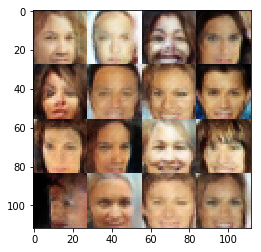

Epoch 2/2... Discriminator Loss: 1.1288 ... Generator Loss: 0.6916
Epoch 2/2... Discriminator Loss: 1.0789 ... Generator Loss: 0.6086
Epoch 2/2... Discriminator Loss: 1.2309 ... Generator Loss: 0.4677
Epoch 2/2... Discriminator Loss: 0.9708 ... Generator Loss: 0.6397
Epoch 2/2... Discriminator Loss: 1.0468 ... Generator Loss: 0.6487
Epoch 2/2... Discriminator Loss: 1.7793 ... Generator Loss: 0.2682
Epoch 2/2... Discriminator Loss: 1.0681 ... Generator Loss: 0.7802
Epoch 2/2... Discriminator Loss: 1.1270 ... Generator Loss: 0.6005
Epoch 2/2... Discriminator Loss: 1.1682 ... Generator Loss: 0.5310
Epoch 2/2... Discriminator Loss: 1.3012 ... Generator Loss: 0.4813


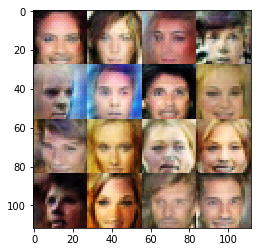

Epoch 2/2... Discriminator Loss: 1.2945 ... Generator Loss: 0.4568
Epoch 2/2... Discriminator Loss: 1.1514 ... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 1.0752 ... Generator Loss: 0.7153
Epoch 2/2... Discriminator Loss: 1.4884 ... Generator Loss: 0.3796
Epoch 2/2... Discriminator Loss: 1.3568 ... Generator Loss: 0.4497
Epoch 2/2... Discriminator Loss: 0.8868 ... Generator Loss: 0.6732
Epoch 2/2... Discriminator Loss: 1.1480 ... Generator Loss: 0.6555
Epoch 2/2... Discriminator Loss: 1.1862 ... Generator Loss: 0.6082
Epoch 2/2... Discriminator Loss: 1.2803 ... Generator Loss: 0.4603
Epoch 2/2... Discriminator Loss: 0.9067 ... Generator Loss: 0.9549


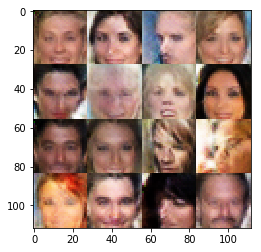

Epoch 2/2... Discriminator Loss: 1.4520 ... Generator Loss: 0.3899
Epoch 2/2... Discriminator Loss: 1.1074 ... Generator Loss: 0.9753
Epoch 2/2... Discriminator Loss: 1.3858 ... Generator Loss: 0.4272
Epoch 2/2... Discriminator Loss: 1.1237 ... Generator Loss: 0.6076
Epoch 2/2... Discriminator Loss: 1.0315 ... Generator Loss: 0.7484
Epoch 2/2... Discriminator Loss: 1.0195 ... Generator Loss: 0.7730
Epoch 2/2... Discriminator Loss: 1.1566 ... Generator Loss: 0.9680
Epoch 2/2... Discriminator Loss: 1.1488 ... Generator Loss: 0.5201
Epoch 2/2... Discriminator Loss: 1.0821 ... Generator Loss: 0.7673
Epoch 2/2... Discriminator Loss: 1.1164 ... Generator Loss: 0.5650


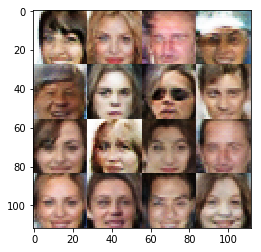

Epoch 2/2... Discriminator Loss: 1.0540 ... Generator Loss: 0.7314
Epoch 2/2... Discriminator Loss: 1.2180 ... Generator Loss: 0.5885
Epoch 2/2... Discriminator Loss: 1.1477 ... Generator Loss: 0.5186
Epoch 2/2... Discriminator Loss: 1.0806 ... Generator Loss: 0.7668
Epoch 2/2... Discriminator Loss: 1.2174 ... Generator Loss: 0.5081
Epoch 2/2... Discriminator Loss: 1.1267 ... Generator Loss: 0.6353
Epoch 2/2... Discriminator Loss: 1.3316 ... Generator Loss: 0.4132
Epoch 2/2... Discriminator Loss: 0.9894 ... Generator Loss: 0.7184
Epoch 2/2... Discriminator Loss: 1.1914 ... Generator Loss: 0.5194
Epoch 2/2... Discriminator Loss: 1.0047 ... Generator Loss: 0.7020


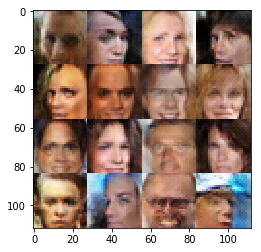

Epoch 2/2... Discriminator Loss: 1.0987 ... Generator Loss: 0.7257
Epoch 2/2... Discriminator Loss: 1.1935 ... Generator Loss: 0.5512
Epoch 2/2... Discriminator Loss: 1.2587 ... Generator Loss: 0.4415
Epoch 2/2... Discriminator Loss: 1.0279 ... Generator Loss: 0.9133
Epoch 2/2... Discriminator Loss: 1.0078 ... Generator Loss: 0.7761
Epoch 2/2... Discriminator Loss: 1.1571 ... Generator Loss: 0.5719
Epoch 2/2... Discriminator Loss: 1.0007 ... Generator Loss: 0.7141
Epoch 2/2... Discriminator Loss: 1.1551 ... Generator Loss: 0.6536
Epoch 2/2... Discriminator Loss: 1.1309 ... Generator Loss: 0.5070
Epoch 2/2... Discriminator Loss: 1.3120 ... Generator Loss: 0.4163


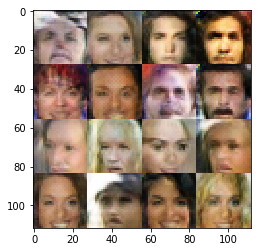

Epoch 2/2... Discriminator Loss: 1.2861 ... Generator Loss: 0.4738
Epoch 2/2... Discriminator Loss: 1.0064 ... Generator Loss: 1.4740
Epoch 2/2... Discriminator Loss: 1.1439 ... Generator Loss: 0.7603
Epoch 2/2... Discriminator Loss: 1.2664 ... Generator Loss: 0.4334
Epoch 2/2... Discriminator Loss: 1.3267 ... Generator Loss: 0.4372
Epoch 2/2... Discriminator Loss: 1.1412 ... Generator Loss: 0.5678
Epoch 2/2... Discriminator Loss: 1.0797 ... Generator Loss: 0.8258
Epoch 2/2... Discriminator Loss: 0.8371 ... Generator Loss: 1.2355
Epoch 2/2... Discriminator Loss: 1.2731 ... Generator Loss: 0.5163
Epoch 2/2... Discriminator Loss: 1.0505 ... Generator Loss: 0.6368


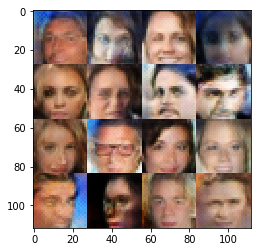

Epoch 2/2... Discriminator Loss: 1.3988 ... Generator Loss: 0.5460
Epoch 2/2... Discriminator Loss: 1.2197 ... Generator Loss: 0.4814
Epoch 2/2... Discriminator Loss: 0.9602 ... Generator Loss: 0.7887
Epoch 2/2... Discriminator Loss: 0.8641 ... Generator Loss: 0.8918
Epoch 2/2... Discriminator Loss: 1.2204 ... Generator Loss: 0.5953
Epoch 2/2... Discriminator Loss: 0.9654 ... Generator Loss: 0.6797
Epoch 2/2... Discriminator Loss: 1.2028 ... Generator Loss: 0.5661
Epoch 2/2... Discriminator Loss: 1.0889 ... Generator Loss: 0.5800
Epoch 2/2... Discriminator Loss: 1.0624 ... Generator Loss: 0.6441
Epoch 2/2... Discriminator Loss: 1.1364 ... Generator Loss: 0.5939


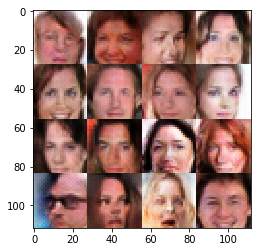

Epoch 2/2... Discriminator Loss: 1.3685 ... Generator Loss: 0.5267
Epoch 2/2... Discriminator Loss: 1.0791 ... Generator Loss: 0.7497
Epoch 2/2... Discriminator Loss: 1.3036 ... Generator Loss: 0.4120
Epoch 2/2... Discriminator Loss: 0.9896 ... Generator Loss: 0.6634
Epoch 2/2... Discriminator Loss: 1.0245 ... Generator Loss: 0.7225
Epoch 2/2... Discriminator Loss: 1.3087 ... Generator Loss: 1.0433
Epoch 2/2... Discriminator Loss: 1.4523 ... Generator Loss: 0.4309
Epoch 2/2... Discriminator Loss: 1.3391 ... Generator Loss: 0.4086
Epoch 2/2... Discriminator Loss: 1.0315 ... Generator Loss: 1.0019
Epoch 2/2... Discriminator Loss: 1.0113 ... Generator Loss: 0.6669


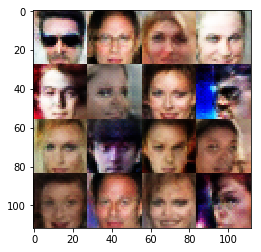

Epoch 2/2... Discriminator Loss: 1.0435 ... Generator Loss: 0.8619
Epoch 2/2... Discriminator Loss: 1.0156 ... Generator Loss: 0.7931
Epoch 2/2... Discriminator Loss: 1.3692 ... Generator Loss: 0.3664
Epoch 2/2... Discriminator Loss: 1.3204 ... Generator Loss: 0.6001
Epoch 2/2... Discriminator Loss: 1.1672 ... Generator Loss: 0.5725
Epoch 2/2... Discriminator Loss: 0.9521 ... Generator Loss: 0.8112
Epoch 2/2... Discriminator Loss: 1.0339 ... Generator Loss: 0.7607
Epoch 2/2... Discriminator Loss: 1.0460 ... Generator Loss: 0.6446
Epoch 2/2... Discriminator Loss: 1.0587 ... Generator Loss: 0.6315
Epoch 2/2... Discriminator Loss: 1.1482 ... Generator Loss: 0.8983


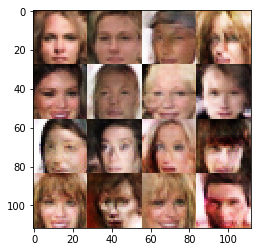

Epoch 2/2... Discriminator Loss: 0.9912 ... Generator Loss: 0.9807
Epoch 2/2... Discriminator Loss: 1.2046 ... Generator Loss: 0.5736
Epoch 2/2... Discriminator Loss: 1.3224 ... Generator Loss: 0.4390
Epoch 2/2... Discriminator Loss: 1.2754 ... Generator Loss: 1.0562
Epoch 2/2... Discriminator Loss: 1.0772 ... Generator Loss: 0.6632
Epoch 2/2... Discriminator Loss: 0.8505 ... Generator Loss: 0.9905
Epoch 2/2... Discriminator Loss: 1.1274 ... Generator Loss: 0.7559
Epoch 2/2... Discriminator Loss: 1.2111 ... Generator Loss: 0.5663
Epoch 2/2... Discriminator Loss: 0.9916 ... Generator Loss: 0.8065
Epoch 2/2... Discriminator Loss: 0.8307 ... Generator Loss: 0.8416


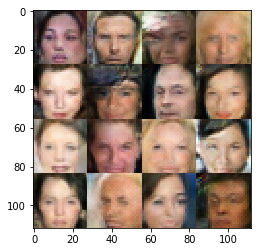

Epoch 2/2... Discriminator Loss: 1.1619 ... Generator Loss: 0.5792
Epoch 2/2... Discriminator Loss: 0.9080 ... Generator Loss: 0.8565
Epoch 2/2... Discriminator Loss: 1.0814 ... Generator Loss: 0.6166
Epoch 2/2... Discriminator Loss: 1.1388 ... Generator Loss: 0.5854
Epoch 2/2... Discriminator Loss: 1.0478 ... Generator Loss: 0.6762
Epoch 2/2... Discriminator Loss: 1.1735 ... Generator Loss: 0.5522
Epoch 2/2... Discriminator Loss: 0.9072 ... Generator Loss: 0.8965
Epoch 2/2... Discriminator Loss: 0.8080 ... Generator Loss: 0.9370
Epoch 2/2... Discriminator Loss: 0.9339 ... Generator Loss: 0.8959
Epoch 2/2... Discriminator Loss: 1.0466 ... Generator Loss: 0.6782


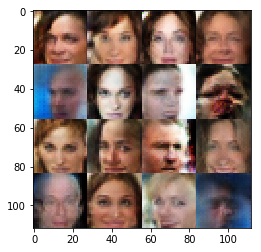

Epoch 2/2... Discriminator Loss: 1.1472 ... Generator Loss: 0.6026
Epoch 2/2... Discriminator Loss: 1.1505 ... Generator Loss: 0.4899
Epoch 2/2... Discriminator Loss: 1.2799 ... Generator Loss: 0.5752
Epoch 2/2... Discriminator Loss: 1.0264 ... Generator Loss: 0.6428
Epoch 2/2... Discriminator Loss: 1.0318 ... Generator Loss: 0.6873
Epoch 2/2... Discriminator Loss: 1.0524 ... Generator Loss: 0.7550
Epoch 2/2... Discriminator Loss: 1.0790 ... Generator Loss: 0.6794
Epoch 2/2... Discriminator Loss: 1.0174 ... Generator Loss: 0.8882
Epoch 2/2... Discriminator Loss: 0.9870 ... Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 1.0845 ... Generator Loss: 0.6720


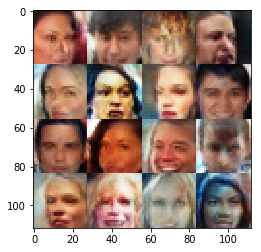

Epoch 2/2... Discriminator Loss: 1.2017 ... Generator Loss: 0.5935
Epoch 2/2... Discriminator Loss: 1.1746 ... Generator Loss: 0.4952
Epoch 2/2... Discriminator Loss: 1.2762 ... Generator Loss: 0.5989
Epoch 2/2... Discriminator Loss: 1.1546 ... Generator Loss: 0.6206
Epoch 2/2... Discriminator Loss: 1.0215 ... Generator Loss: 0.7636
Epoch 2/2... Discriminator Loss: 1.1458 ... Generator Loss: 0.5893


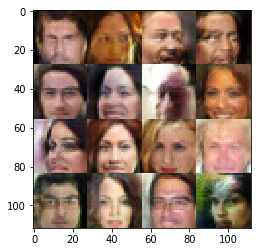

In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.